# DROP ROBOT FROM MODEKLS

# Data Import

In [39]:
%%time

import os
import math
import datetime
import numpy as np
import pandas as pd
from copy import copy
from tqdm import tqdm

# Dictionaries
import json
from pprint import pprint

# Iterate in loops
import itertools
from itertools import zip_longest

# Simpsons integration
from numpy import trapz
from scipy.integrate import simps

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# To display df nicely in loops
from IPython.display import display 
# display(df1.head()) 
# display(df2.head())

# Display rows and columns Pandas
pd.options.display.max_columns = 100
pd.set_option('display.max_rows',100)

Wall time: 0 ns


In [40]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance

In [41]:
# Prints the current working directory
os.getcwd()
# os.listdir()

'C:\\Users\\fahad\\MegaSync\\NMBU\\GitHub\\vPheno'

## Finding Username folder to make general path for multi PC use

In [42]:
username = str(os.getcwd()).split('\\')[2]
user_path = r'C:/Users/'+username+'/'
username, user_path

('fahad', 'C:/Users/fahad/')

## Importing Data

In [43]:
main_path = r'./Data/'
# path = r'./Data/3. merged data/'
path = r'./Data/3. merged data/'
export_path = './Data/4. results/'


# Create export_path folder if not exists already
os.makedirs(path, exist_ok=True)
os.makedirs(export_path, exist_ok=True)

os.listdir(path)

['Graminor_2019_Simps.csv',
 'Graminor_2019_Trapz.csv',
 'Graminor_2020_Simps.csv',
 'Graminor_2020_Trapz.csv',
 'Masbasis_2019_Simps.csv',
 'Masbasis_2019_Trapz.csv',
 'Masbasis_2020_Simps.csv',
 'Masbasis_2020_Trapz.csv',
 'Robot_2020_Simps.csv',
 'Robot_2020_Trapz.csv',
 'Staur_2019_Simps.csv',
 'Staur_2019_Trapz.csv',
 'Staur_2020_Simps.csv',
 'Staur_2020_Trapz.csv']

# Data Preparation
## Creating list of complete files

In [44]:
# Get the list of all files in directory tree at given path

files_with_address = []
files_list = []

for (dirpath, dirnames, filenames) in os.walk(path):
    files_with_address += [os.path.join(dirpath, file) for file in filenames]
    files_list.extend(filenames)
    
print(len(files_with_address), 'files found in the directory')
# files_with_address
files_list

14 files found in the directory


['Graminor_2019_Simps.csv',
 'Graminor_2019_Trapz.csv',
 'Graminor_2020_Simps.csv',
 'Graminor_2020_Trapz.csv',
 'Masbasis_2019_Simps.csv',
 'Masbasis_2019_Trapz.csv',
 'Masbasis_2020_Simps.csv',
 'Masbasis_2020_Trapz.csv',
 'Robot_2020_Simps.csv',
 'Robot_2020_Trapz.csv',
 'Staur_2019_Simps.csv',
 'Staur_2019_Trapz.csv',
 'Staur_2020_Simps.csv',
 'Staur_2020_Trapz.csv']

# Data Checking/control

## Check for duplicate filenames

In [45]:
print('Total number of files are :', len(files_list))

print('Number of unique file names are:', len(set(files_list)))

print('There is/are', len(files_list) - len(set(files_list)),'duplicate file name/names.')
if len(files_list) - len(set(files_list)) > 0:
    raise NameError

Total number of files are : 14
Number of unique file names are: 14
There is/are 0 duplicate file name/names.


# Importing data files to Pandas

In [46]:
   
%%time

all_df = []
for data in files_with_address:
    file_name = os.path.splitext(os.path.basename(data))[0]

    # Replce all invalid characters in the name
    file_name = file_name.replace(" ", "_")
    file_name = file_name.replace("-", "_")
    file_name = file_name.replace(")", "")
    file_name = file_name.replace("(", "")
    df_name = file_name.replace(".", "")
    # Test: Check if the same date is already present in the current dict key
    if df_name in all_df:
        print(f'A file with the same name {df_name} has already been imported. \n Please check if there is duplication of data.')
        raise NameError
    all_df.append(df_name)

    locals()[df_name] = pd.read_csv(data, index_col=False)
    print(df_name, '=====', locals()[df_name].shape)
# all_df

Graminor_2019_Simps ===== (600, 158)
Graminor_2019_Trapz ===== (600, 158)
Graminor_2020_Simps ===== (800, 158)
Graminor_2020_Trapz ===== (800, 158)
Masbasis_2019_Simps ===== (528, 160)
Masbasis_2019_Trapz ===== (528, 160)
Masbasis_2020_Simps ===== (659, 162)
Masbasis_2020_Trapz ===== (659, 162)
Robot_2020_Simps ===== (96, 162)
Robot_2020_Trapz ===== (96, 162)
Staur_2019_Simps ===== (1328, 159)
Staur_2019_Trapz ===== (1328, 159)
Staur_2020_Simps ===== (1504, 159)
Staur_2020_Trapz ===== (1504, 159)
Wall time: 367 ms


Old  
Masbasis_2019 ===== (528, 160)  
Masbasis_2020 ===== (637, 162)  
Robot_2020 ===== (96, 162)  
Staur_2019 ===== (162, 160)  

In [47]:
print(f'Total imported {len(all_df)}')
all_df

Total imported 14


['Graminor_2019_Simps',
 'Graminor_2019_Trapz',
 'Graminor_2020_Simps',
 'Graminor_2020_Trapz',
 'Masbasis_2019_Simps',
 'Masbasis_2019_Trapz',
 'Masbasis_2020_Simps',
 'Masbasis_2020_Trapz',
 'Robot_2020_Simps',
 'Robot_2020_Trapz',
 'Staur_2019_Simps',
 'Staur_2019_Trapz',
 'Staur_2020_Simps',
 'Staur_2020_Trapz']

# Finding yield columns

In [48]:
# ToDo: Add check for duplicate columns in the df

general_col_names = ['Plot_ID', 'Blue', 'Green', 'Red', 'RedEdge', 'NIR']

base_indices = ['Blue', 'Green', 'Red', 'RedEdge', 'NIR']

spectral_indices = ['NDVI', 'MTCI', 'DVI', 'GDVI', 'MTCI_CI', 'EXG', 'EXGR', 'RDVI',
                    'TDVI', 'GNDVI', 'NDRE', 'SCCI', 'EVI', 'TVI', 'VARI', 'GARI',
                    'GCI', 'GLI', 'NLI', 'MNLI', 'SAVI', 'GSAVI', 'OSAVI', 'GOSAVI',
                    'MSAVI2', 'MSR', 'GRVI', 'WDRVI', 'SR']
# list_agg_df
yield_cols = ['GrainYield', 'Name', 'CodeName', 'Pedigree', 'Line', 'Heading_Date',
              'Maturity_Date', 'Days2Heading', 'Days2Maturity', 'Lodging']

# Counter for location of column in columns list

# Dict for saving the name and location of the yield column/s
loc_yield_cols = {}
for df in all_df:
    loc = 0
    for cols in locals()[df].columns.tolist():
        for y_col in yield_cols:
            if not cols.find(y_col):
                loc_yield_cols[cols+'_'+df] = loc
                print(f'\"{cols}\" column in {df} is the yield column\n as it contains the text \"{y_col}\". It is located at location {loc}')
        loc += 1

    yield_cols_found = list(loc_yield_cols.keys())
    target_cols=yield_cols_found[0]
loc_yield_cols

"GrainYield" column in Graminor_2019_Simps is the yield column
 as it contains the text "GrainYield". It is located at location 1
"Name" column in Graminor_2019_Simps is the yield column
 as it contains the text "Name". It is located at location 2
"Pedigree" column in Graminor_2019_Simps is the yield column
 as it contains the text "Pedigree". It is located at location 37
"GrainYield" column in Graminor_2019_Trapz is the yield column
 as it contains the text "GrainYield". It is located at location 1
"Name" column in Graminor_2019_Trapz is the yield column
 as it contains the text "Name". It is located at location 2
"Pedigree" column in Graminor_2019_Trapz is the yield column
 as it contains the text "Pedigree". It is located at location 37
"GrainYield" column in Graminor_2020_Simps is the yield column
 as it contains the text "GrainYield". It is located at location 1
"Name" column in Graminor_2020_Simps is the yield column
 as it contains the text "Name". It is located at location 2
"P

{'GrainYield_Graminor_2019_Simps': 1,
 'Name_Graminor_2019_Simps': 2,
 'Pedigree_Graminor_2019_Simps': 37,
 'GrainYield_Graminor_2019_Trapz': 1,
 'Name_Graminor_2019_Trapz': 2,
 'Pedigree_Graminor_2019_Trapz': 37,
 'GrainYield_Graminor_2020_Simps': 1,
 'Name_Graminor_2020_Simps': 2,
 'Pedigree_Graminor_2020_Simps': 37,
 'GrainYield_Graminor_2020_Trapz': 1,
 'Name_Graminor_2020_Trapz': 2,
 'Pedigree_Graminor_2020_Trapz': 37,
 'GrainYield_Masbasis_2019_Simps': 1,
 'Name_Masbasis_2019_Simps': 2,
 'Line_Masbasis_2019_Simps': 3,
 'Days2Heading_Masbasis_2019_Simps': 4,
 'Days2Maturity_Masbasis_2019_Simps': 39,
 'GrainYield_Masbasis_2019_Trapz': 1,
 'Name_Masbasis_2019_Trapz': 2,
 'Line_Masbasis_2019_Trapz': 3,
 'Days2Heading_Masbasis_2019_Trapz': 4,
 'Days2Maturity_Masbasis_2019_Trapz': 39,
 'GrainYield_Masbasis_2020_Simps': 1,
 'Name_Masbasis_2020_Simps': 2,
 'Line_Masbasis_2020_Simps': 3,
 'Maturity_Date_Masbasis_2020_Simps': 4,
 'Days2Heading_Masbasis_2020_Simps': 5,
 'Days2Maturity_Masba

# Dropping unnecessary columns


In [49]:
# Dropping unnecessary columns

for df in all_df:
    temp_df = locals()[df].copy()
    locals()[df] = temp_df[base_indices+spectral_indices+['GrainYield']]

# Dealing with Nan values

## Dropping Missing values

In [50]:
# Dropping rows with missing value in any column

for df in all_df:
    temp_df = locals()[df].copy()
    locals()[df] = temp_df.dropna(axis=0)
    print(temp_df.shape[0] - locals()[df].shape[0], ' rows dropped in ', df)
#     print(locals()[df].shape[0])

1  rows dropped in  Graminor_2019_Simps
1  rows dropped in  Graminor_2019_Trapz
1  rows dropped in  Graminor_2020_Simps
1  rows dropped in  Graminor_2020_Trapz
6  rows dropped in  Masbasis_2019_Simps
6  rows dropped in  Masbasis_2019_Trapz
116  rows dropped in  Masbasis_2020_Simps
116  rows dropped in  Masbasis_2020_Trapz
0  rows dropped in  Robot_2020_Simps
0  rows dropped in  Robot_2020_Trapz
0  rows dropped in  Staur_2019_Simps
0  rows dropped in  Staur_2019_Trapz
568  rows dropped in  Staur_2020_Simps
568  rows dropped in  Staur_2020_Trapz


Old  
6  rows dropped in  Masbasis_2019  
522  
94  rows dropped in  Masbasis_2020  
543  
0  rows dropped in  Robot_2020  
96  
0  rows dropped in  Staur_2019  
162  

# Preprocessing 

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import time, datetime
from datetime import datetime as dt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
# import xgboost as xgb
from sklearn.linear_model import Lasso
# from catboost import CatBoostRegressor

import time, datetime
from datetime import datetime as dt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


## Importing declared functions

In [52]:
from functions.plot_feature_importance import plot_feature_importance
from functions.grid_search import grid
from functions.test_data_regression import test_data_regression

In [53]:
# Number of cores in the system being used
import multiprocessing
multiprocessing.cpu_count()

import psutil
psutil.cpu_count()

import cpuinfo
info = cpuinfo.get_cpu_info()
print('python_version:', info['python_version'])
print(info['arch'])
print(info['bits'])
print(info['count'])
print(info['arch_string_raw'])
print(info['vendor_id_raw'])
print(info['brand_raw'])
print(info['hz_advertised_friendly'])




python_version: 3.8.5.final.0 (64 bit)
X86_64
64
8
AMD64
GenuineIntel
Intel(R) Core(TM) i7-8565U CPU @ 1.80GHz
1.8000 GHz


# Correlation

In [54]:
# Step 1 - Make a scatter plot with square markers, set column names as labels

def heatmap(x, y, size):
    fig_size=(15,10)

    fig, ax = plt.subplots(figsize=fig_size)
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in x.unique()]
    y_labels = [v for v in y.unique()]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 50
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
    


In [55]:
# for df in all_df:
#     print(df)
#     temp_df = locals()[df][base_indices+spectral_indices+['GrainYield']].copy()
#     data = temp_df

    
#     fig, ax = plt.subplots(figsize=(10, 8))
#     # mask
#     mask = np.triu(np.ones_like(data, dtype=np.bool))
#     # adjust mask and df
#     mask = mask[1:, :-1]
#     corr = data.iloc[1:,:-1].copy()
#     # plot heatmap
#     print('u1')

#     sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
#                vmin=-1, vmax=1, cbar_kws={"shrink": .8})
#     # yticks
#     print('u2')
#     # plt.yticks(rotation=0)
#     print('u3')

#     plt.show()
#     print('u4')


In [56]:
all_df

['Graminor_2019_Simps',
 'Graminor_2019_Trapz',
 'Graminor_2020_Simps',
 'Graminor_2020_Trapz',
 'Masbasis_2019_Simps',
 'Masbasis_2019_Trapz',
 'Masbasis_2020_Simps',
 'Masbasis_2020_Trapz',
 'Robot_2020_Simps',
 'Robot_2020_Trapz',
 'Staur_2019_Simps',
 'Staur_2019_Trapz',
 'Staur_2020_Simps',
 'Staur_2020_Trapz']

Graminor_2019_Simps
Graminor_2019_Simps


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


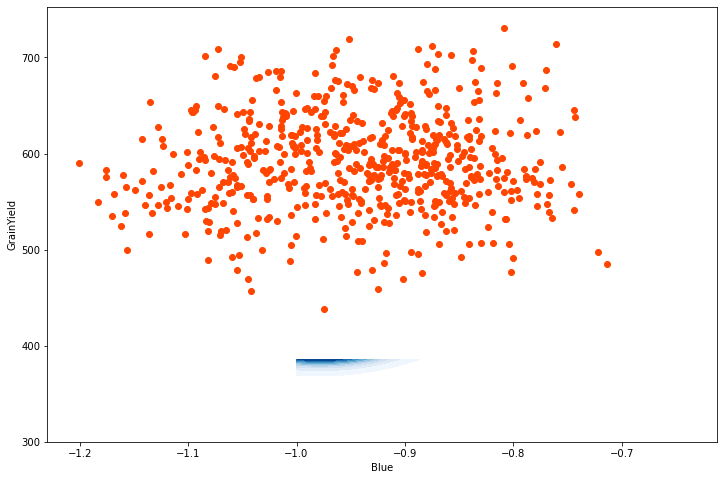

Graminor_2019_Simps


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


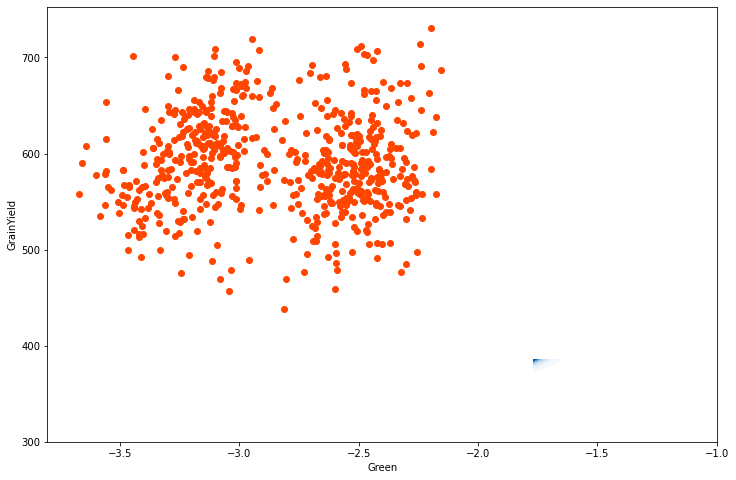

Graminor_2019_Simps


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


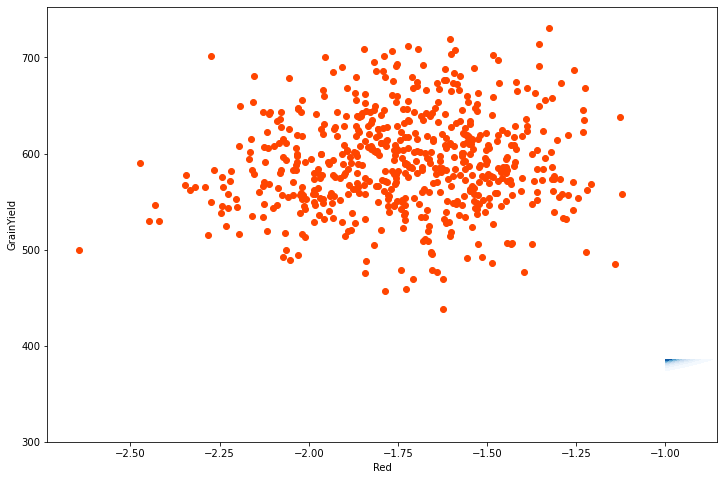

Graminor_2019_Simps


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


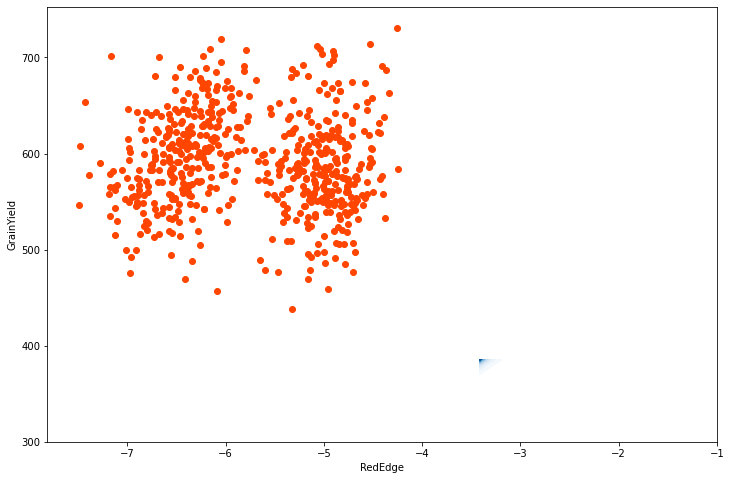

Graminor_2019_Simps


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


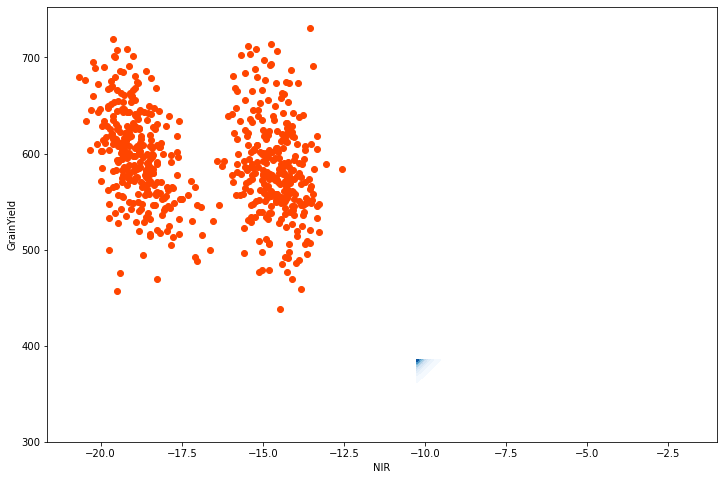

Graminor_2019_Trapz
Graminor_2019_Trapz


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


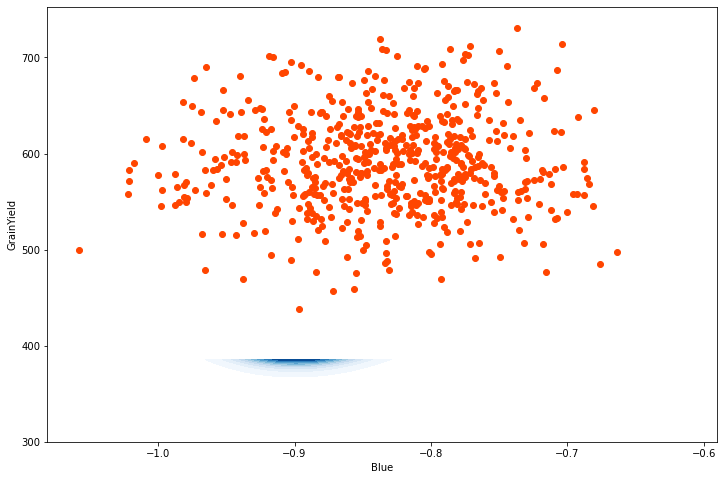

Graminor_2019_Trapz


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


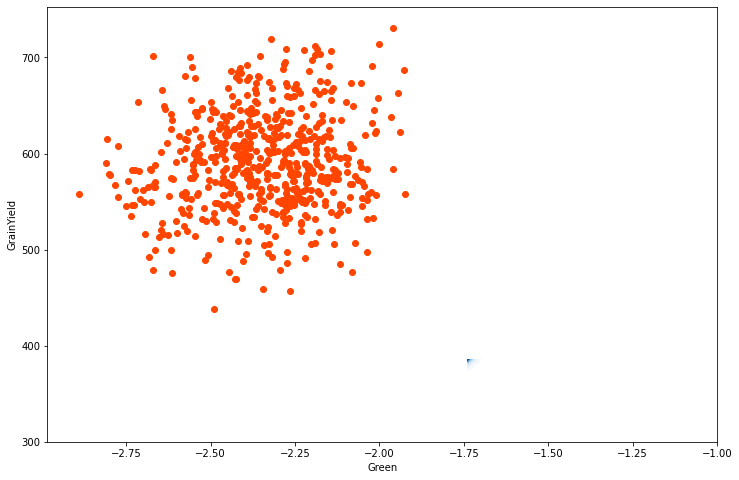

Graminor_2019_Trapz


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


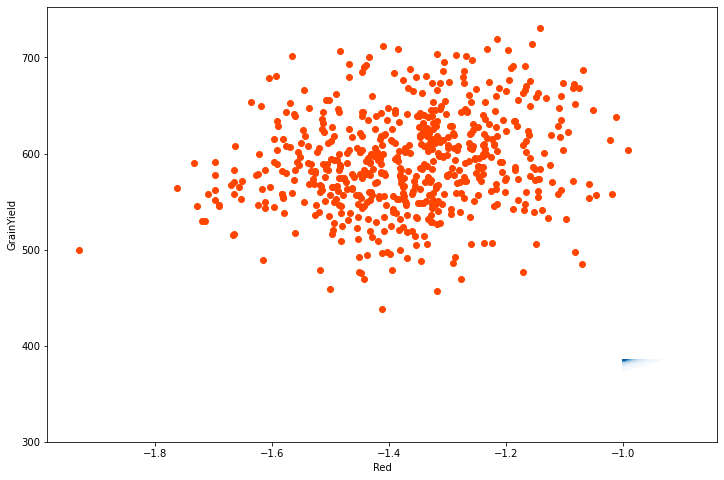

Graminor_2019_Trapz


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


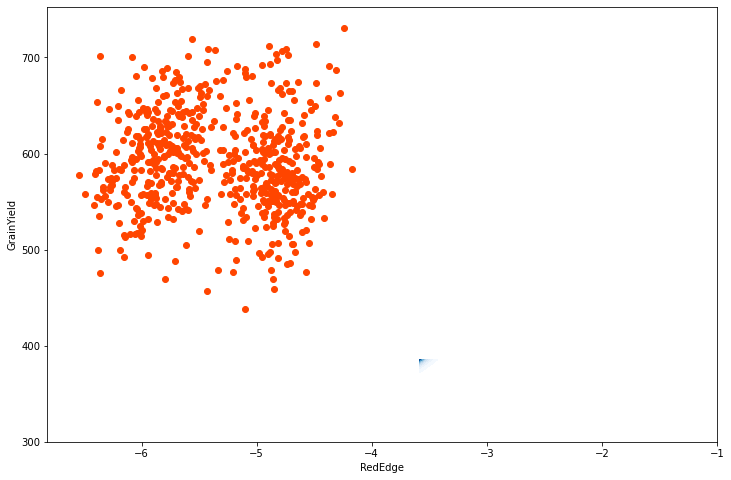

Graminor_2019_Trapz


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


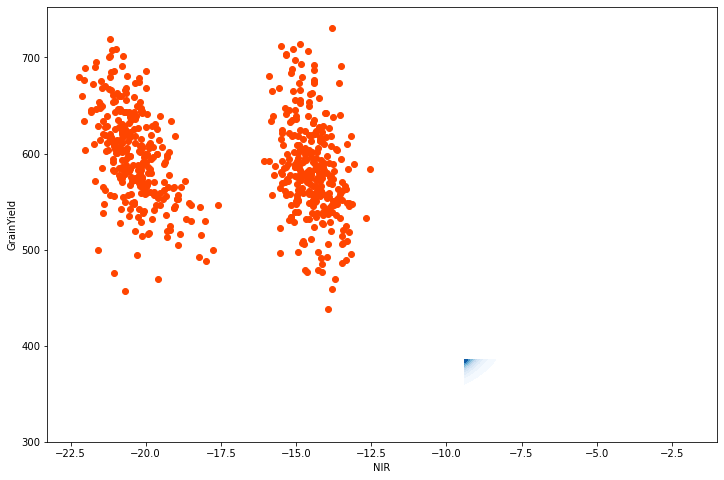

Graminor_2020_Simps
Graminor_2020_Simps


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


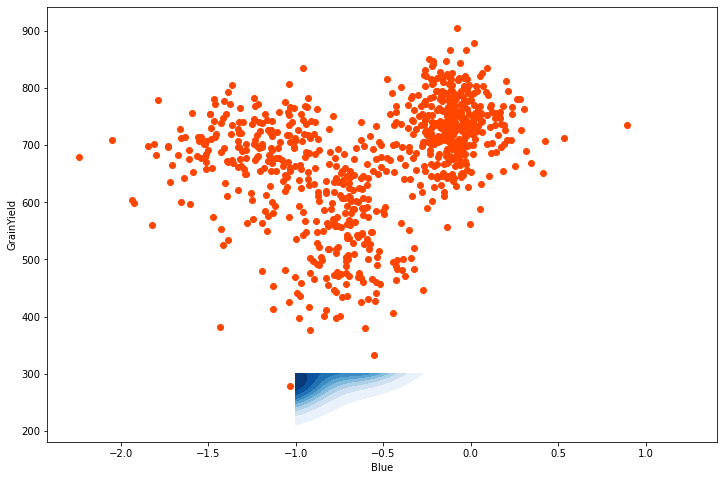

Graminor_2020_Simps


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


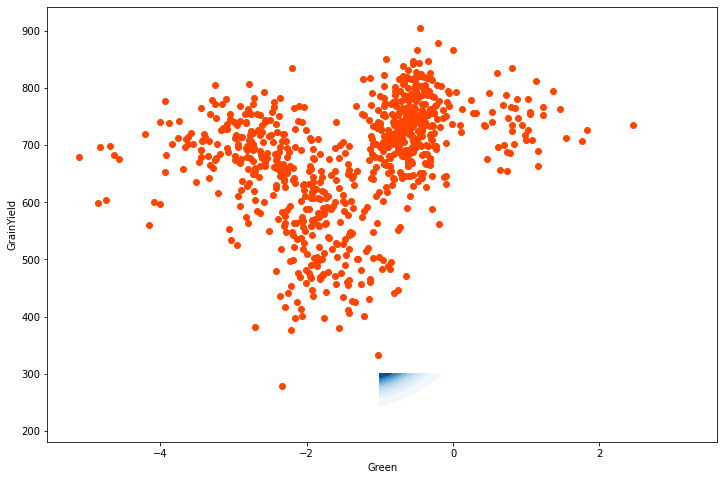

Graminor_2020_Simps


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


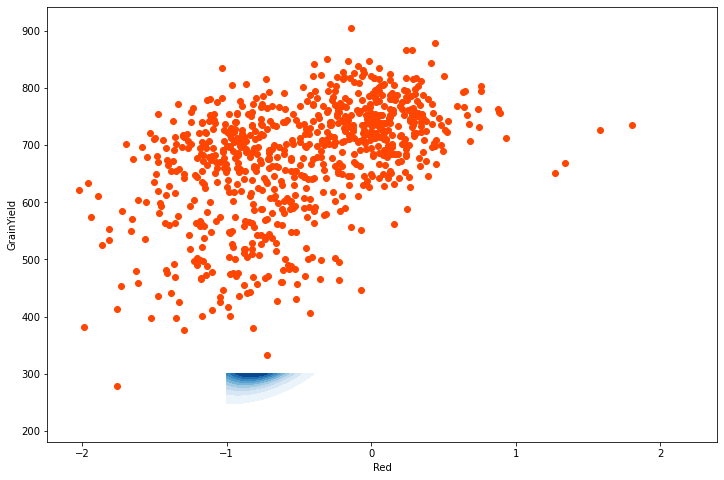

Graminor_2020_Simps


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


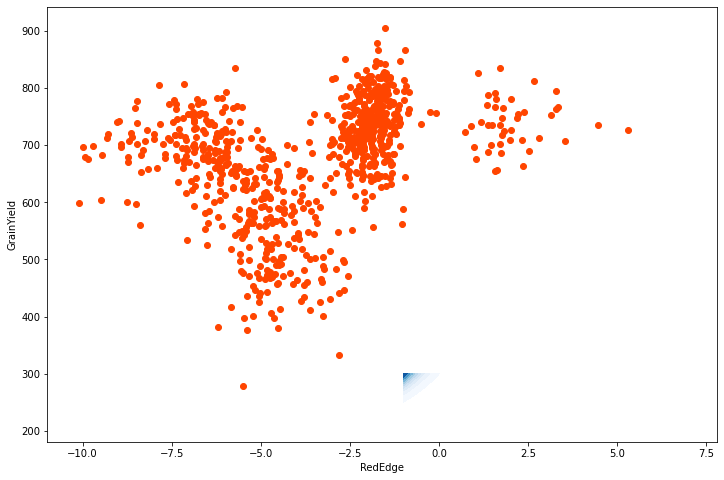

Graminor_2020_Simps


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


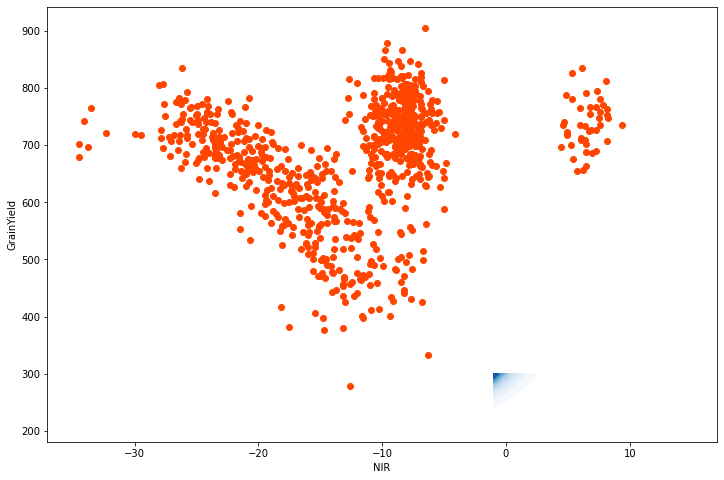

Graminor_2020_Trapz
Graminor_2020_Trapz


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


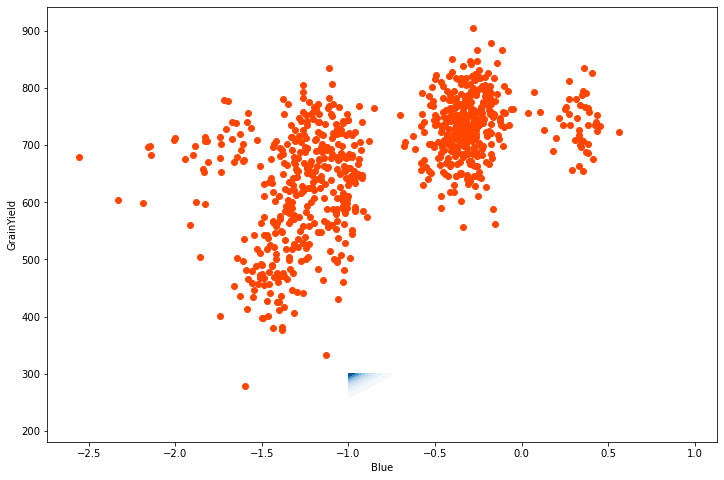

Graminor_2020_Trapz


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


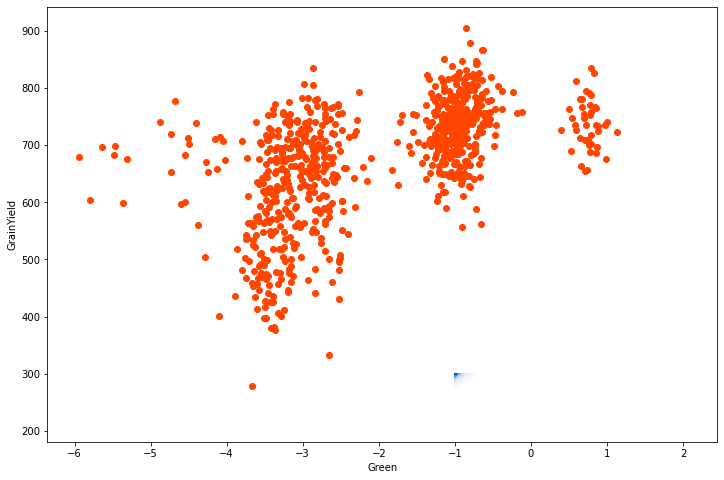

Graminor_2020_Trapz


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


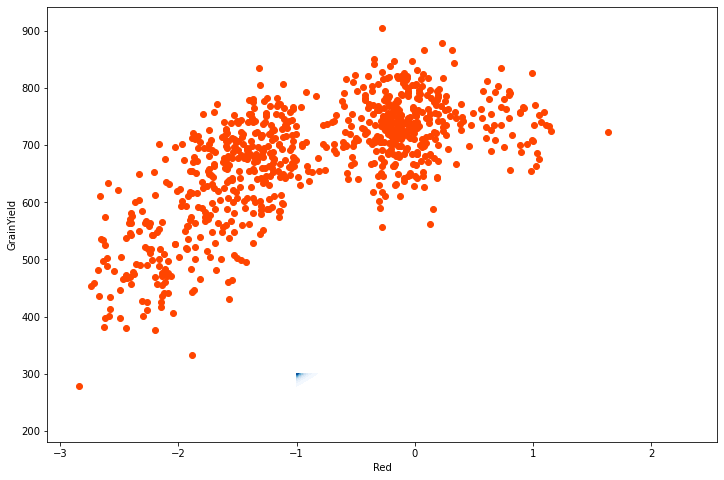

Graminor_2020_Trapz


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


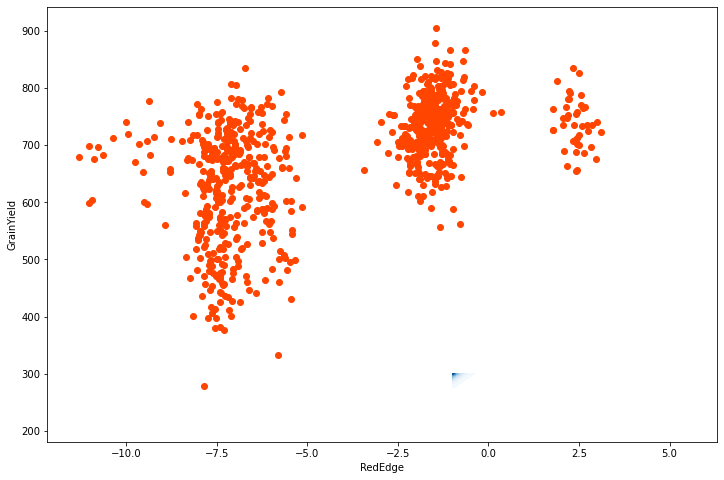

Graminor_2020_Trapz


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


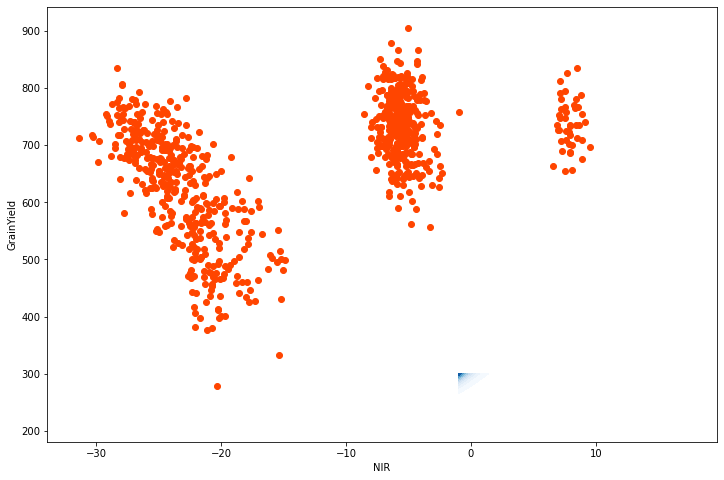

Masbasis_2019_Simps
Masbasis_2019_Simps


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


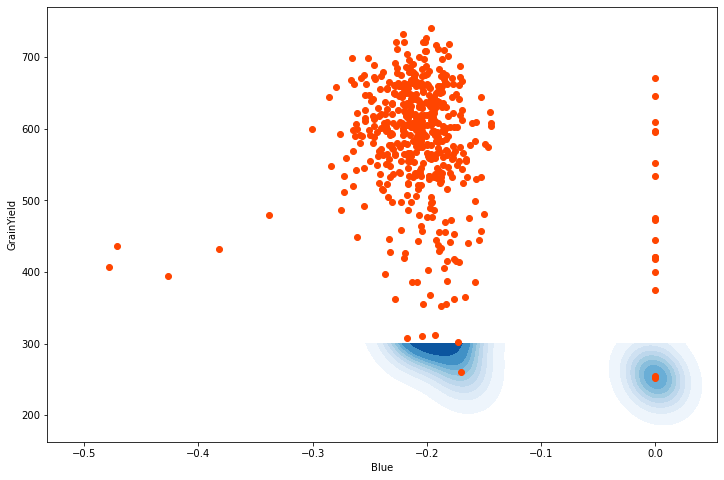

Masbasis_2019_Simps


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


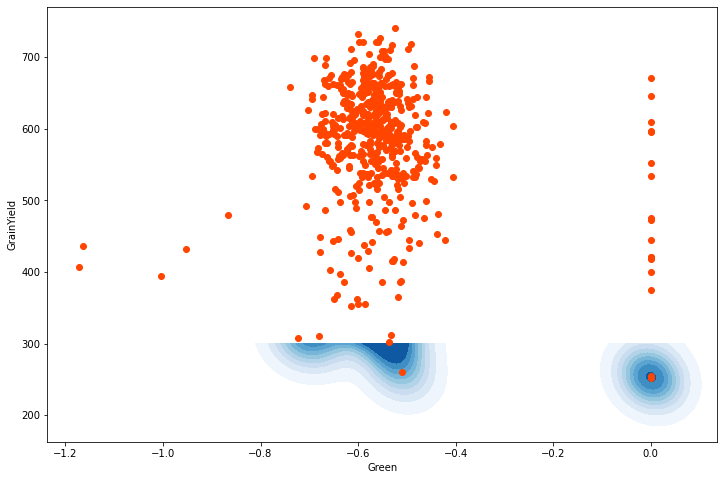

Masbasis_2019_Simps


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


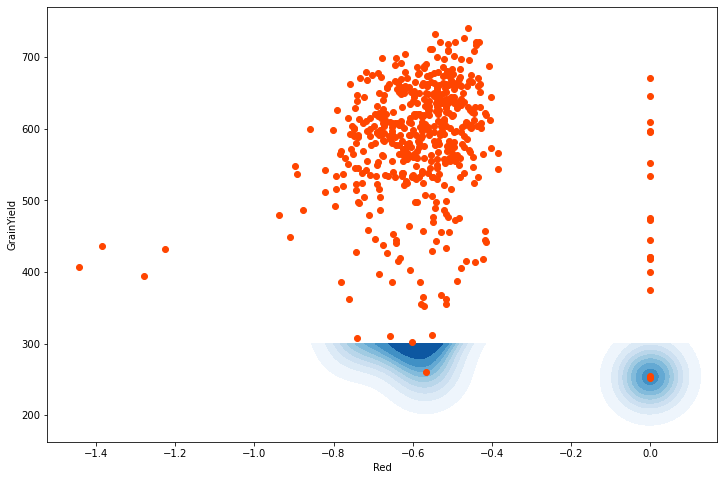

Masbasis_2019_Simps


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


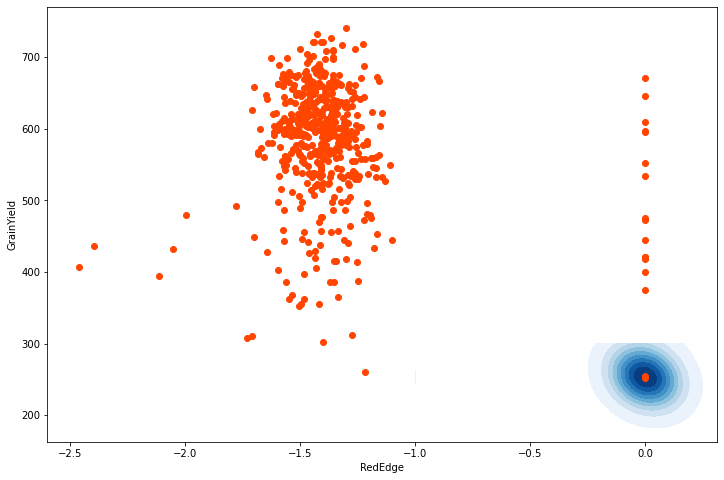

Masbasis_2019_Simps


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


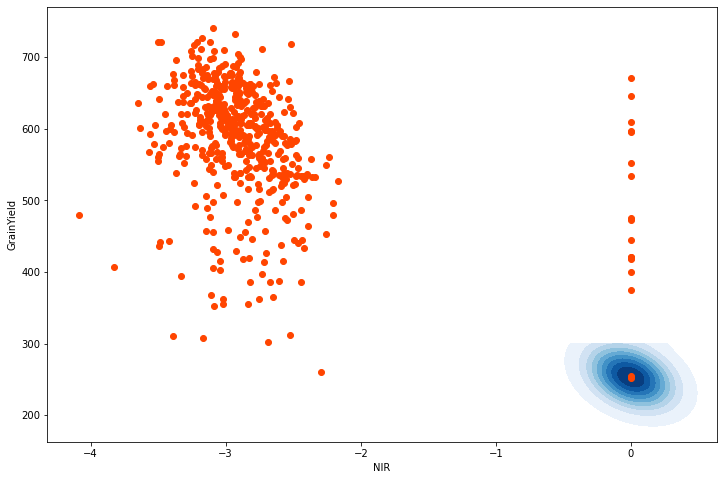

Masbasis_2019_Trapz
Masbasis_2019_Trapz


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


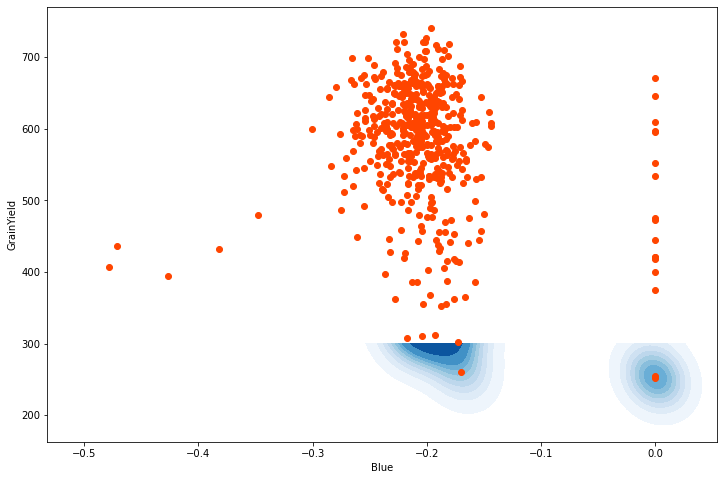

Masbasis_2019_Trapz


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


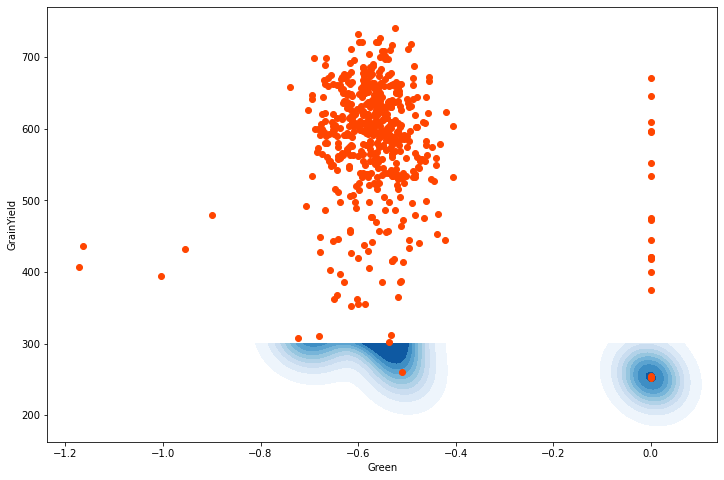

Masbasis_2019_Trapz


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


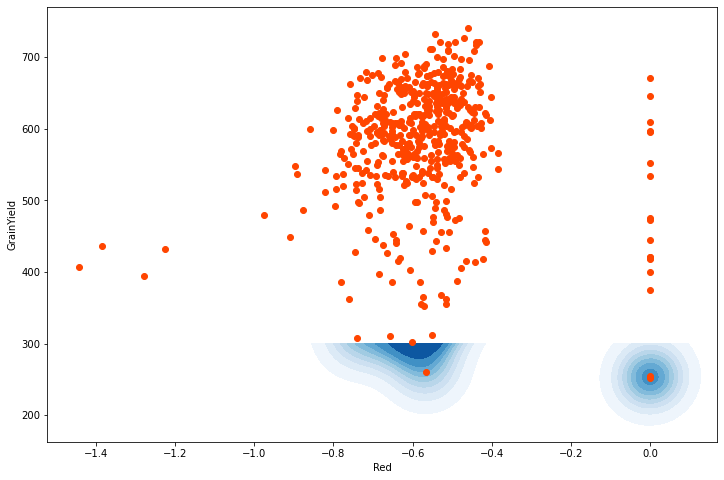

Masbasis_2019_Trapz


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


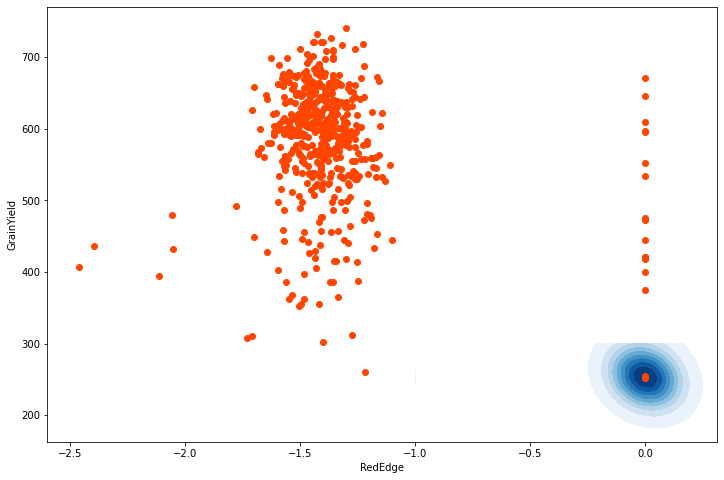

Masbasis_2019_Trapz


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


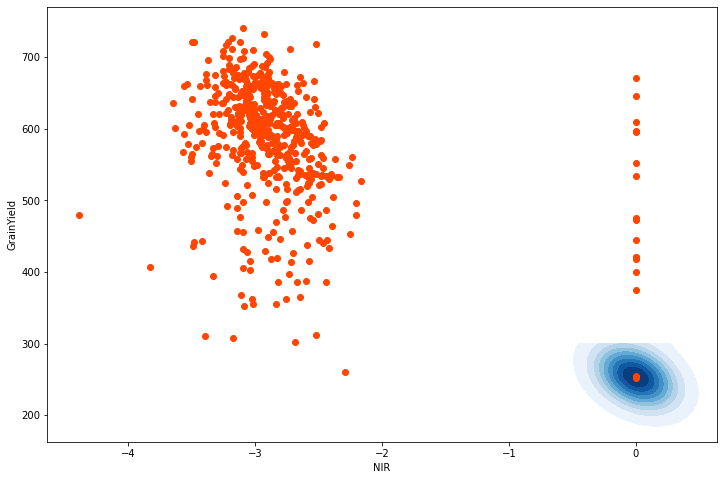

Masbasis_2020_Simps
Masbasis_2020_Simps


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


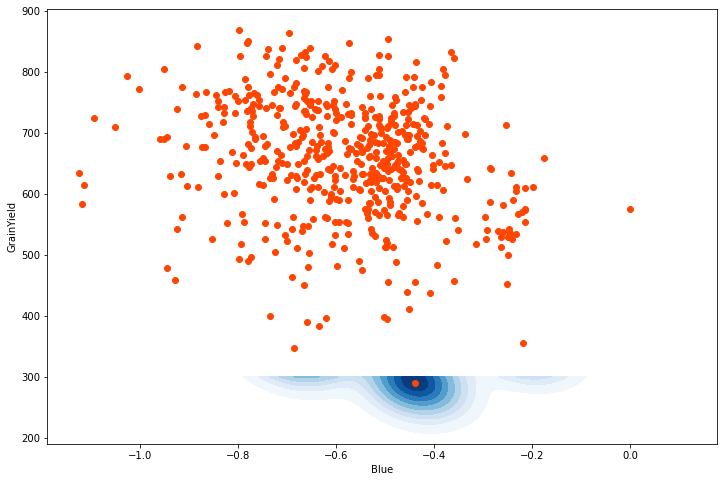

Masbasis_2020_Simps


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


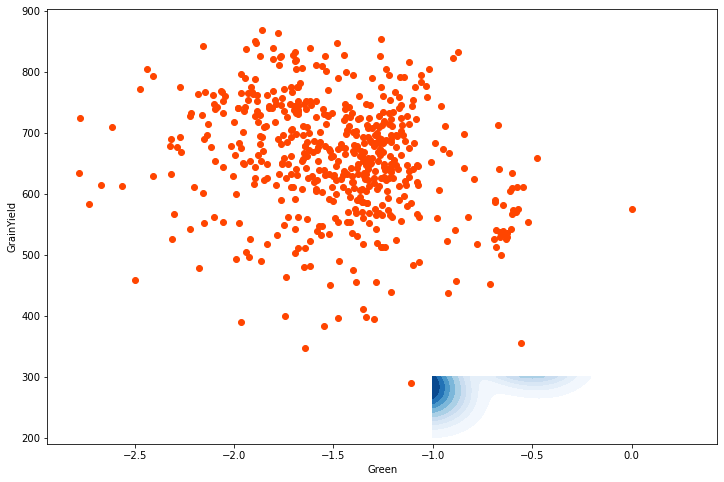

Masbasis_2020_Simps


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


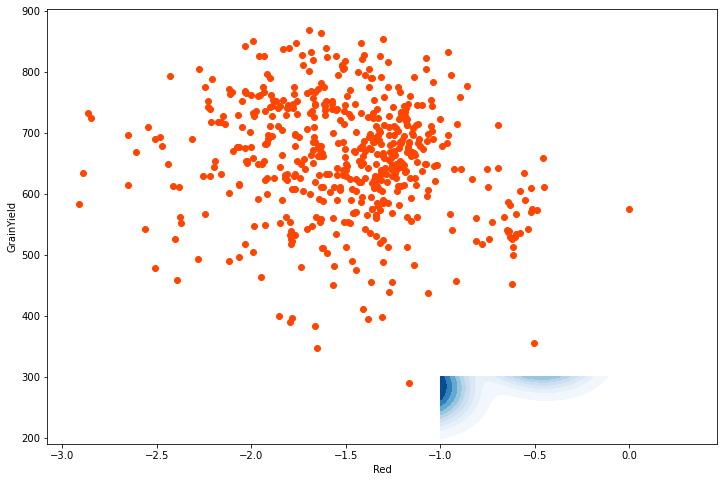

Masbasis_2020_Simps


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


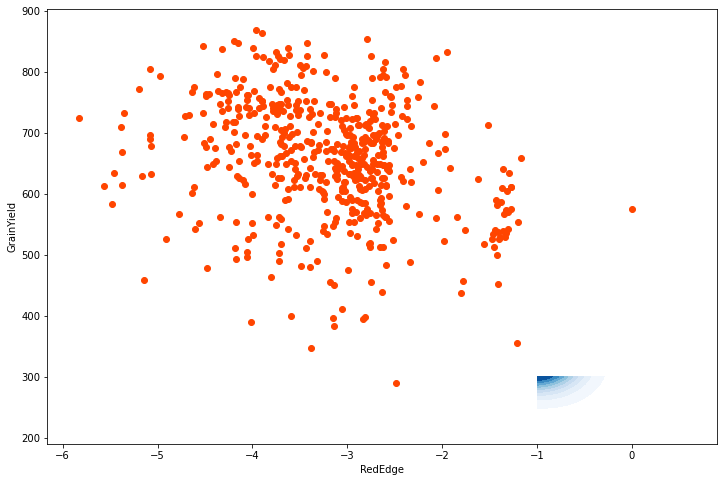

Masbasis_2020_Simps


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


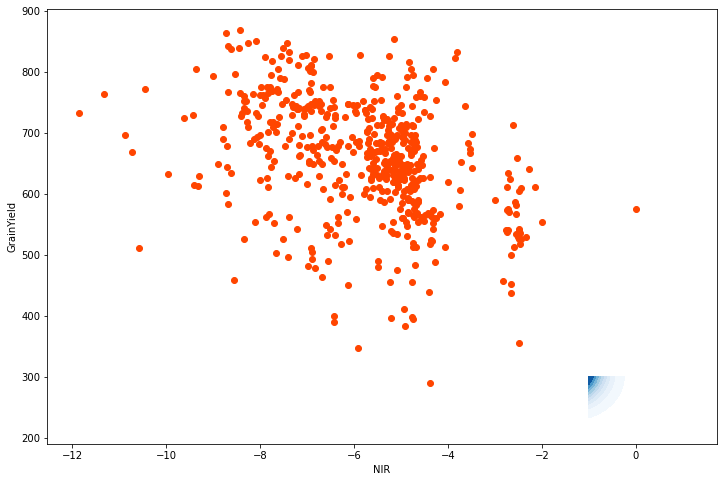

Masbasis_2020_Trapz
Masbasis_2020_Trapz


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


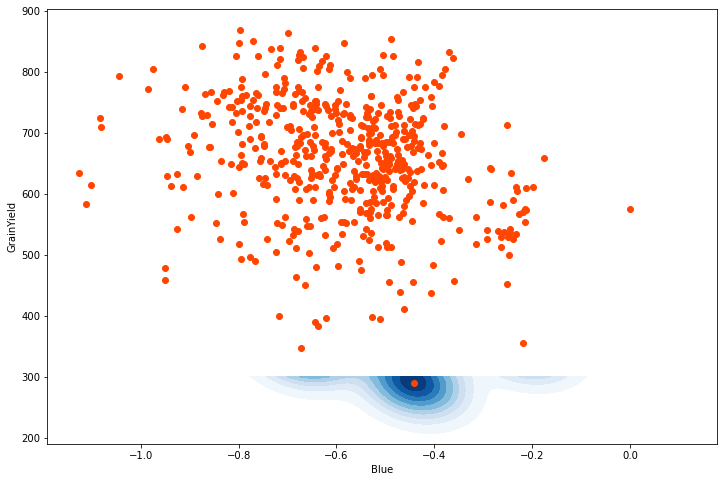

Masbasis_2020_Trapz


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


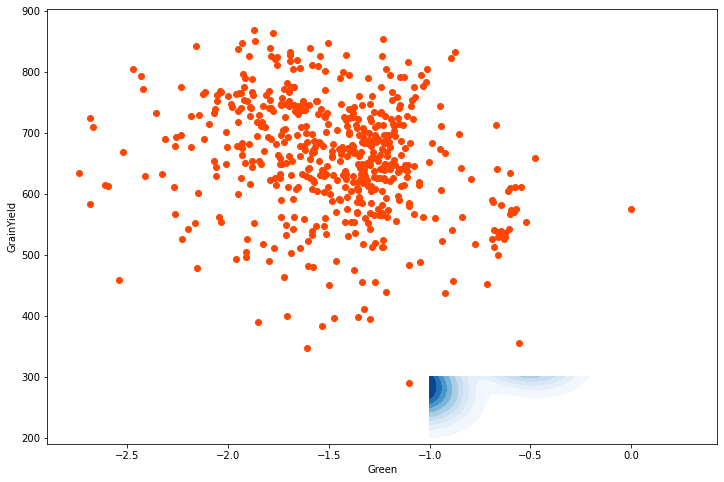

Masbasis_2020_Trapz


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


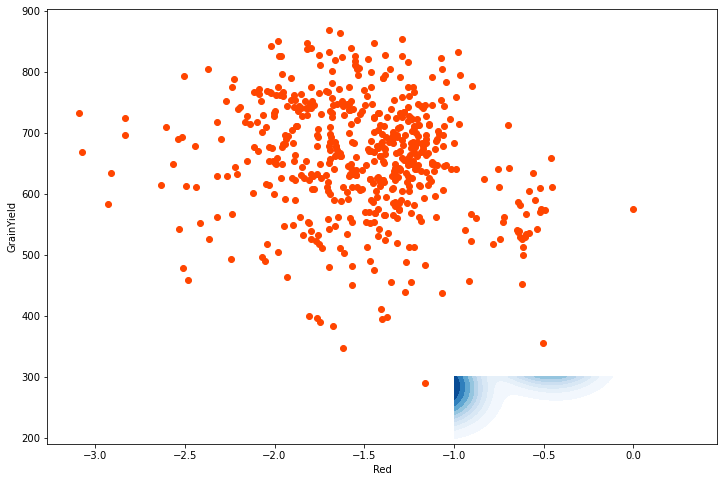

Masbasis_2020_Trapz


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


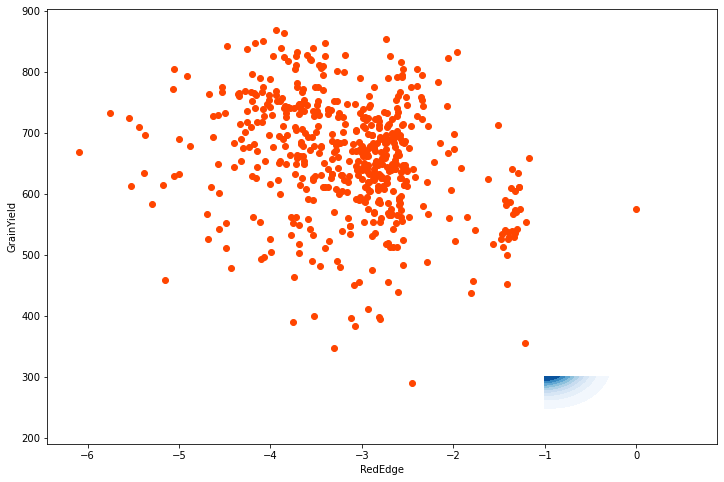

Masbasis_2020_Trapz


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


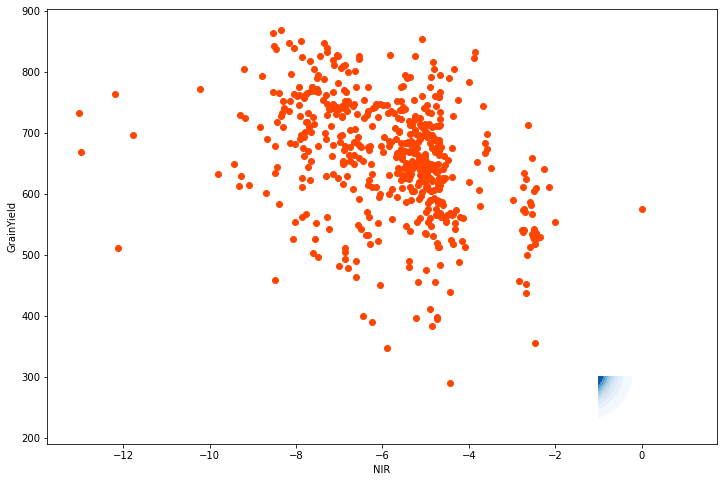

Robot_2020_Simps
Robot_2020_Simps


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


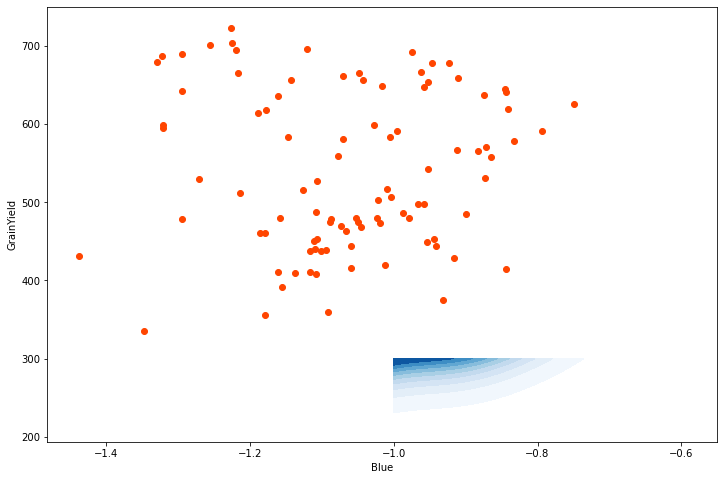

Robot_2020_Simps


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


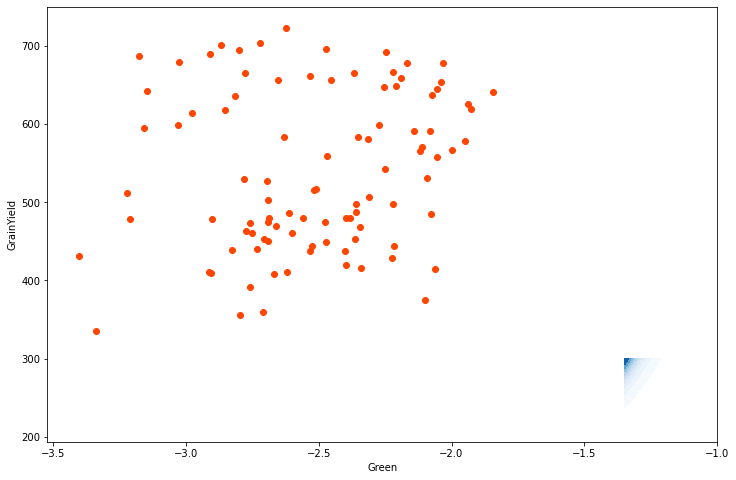

Robot_2020_Simps


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


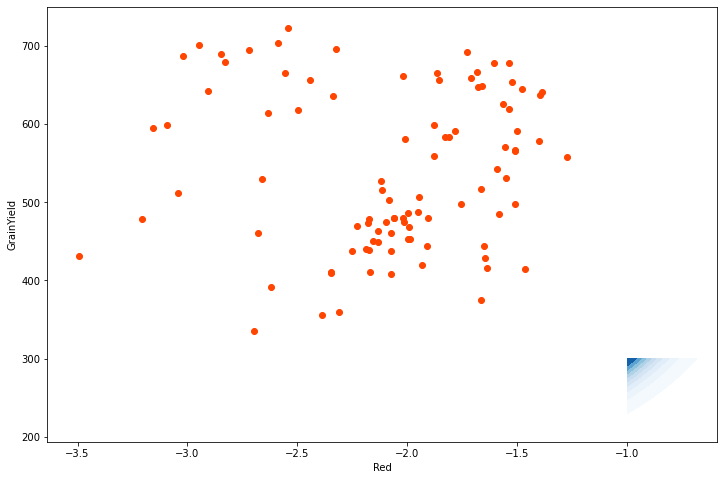

Robot_2020_Simps


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


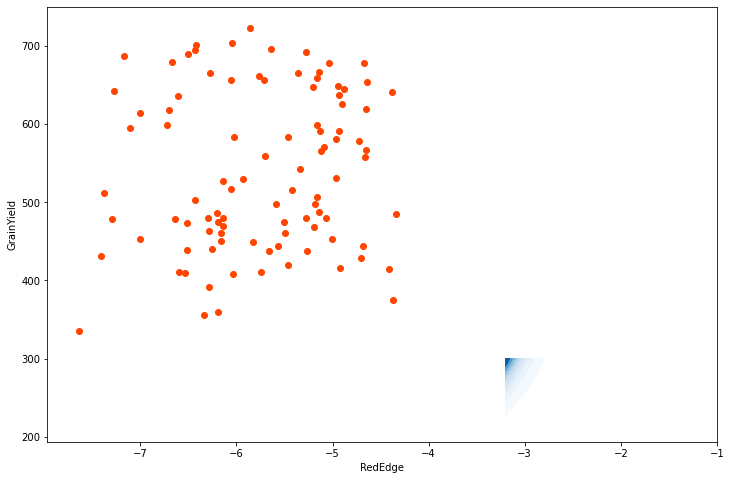

Robot_2020_Simps


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


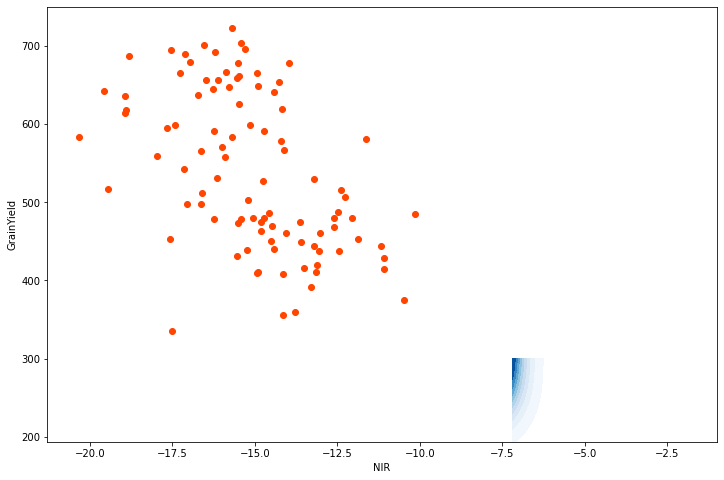

Robot_2020_Trapz
Robot_2020_Trapz


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


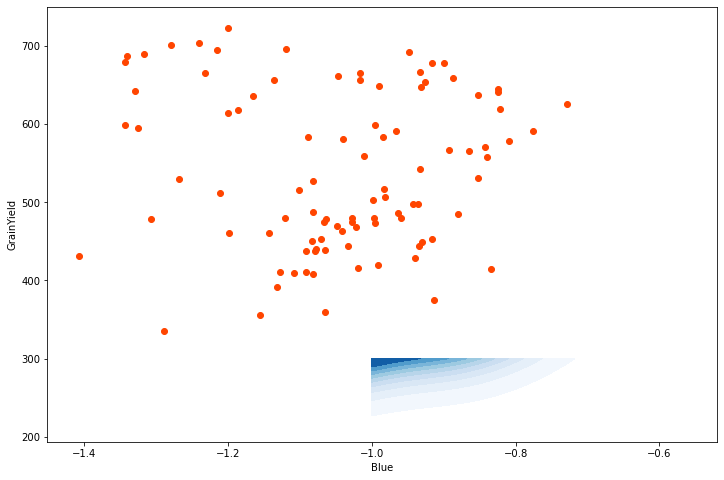

Robot_2020_Trapz


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


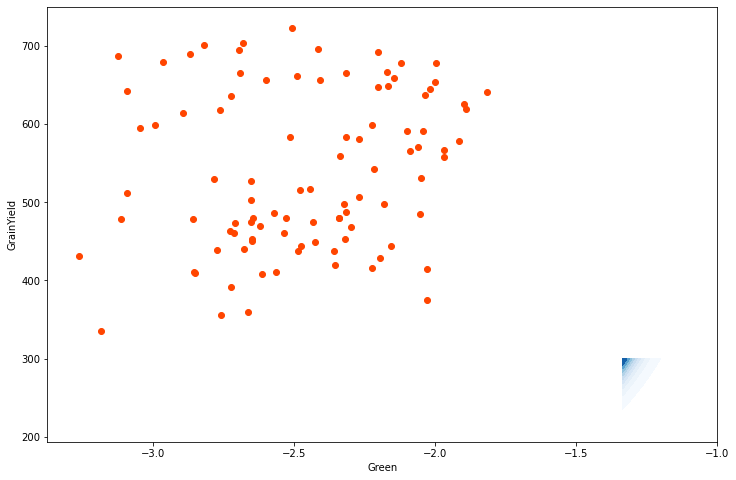

Robot_2020_Trapz


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


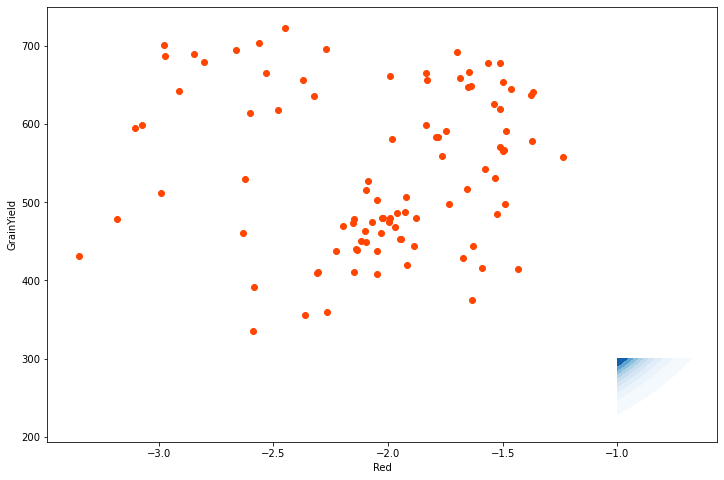

Robot_2020_Trapz


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


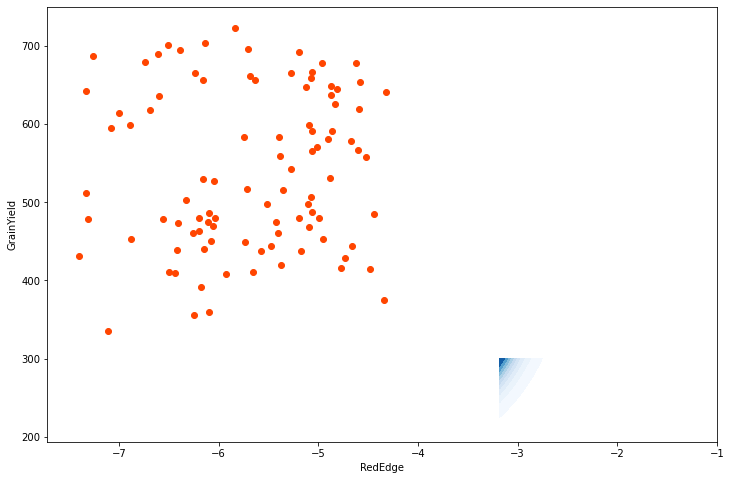

Robot_2020_Trapz


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


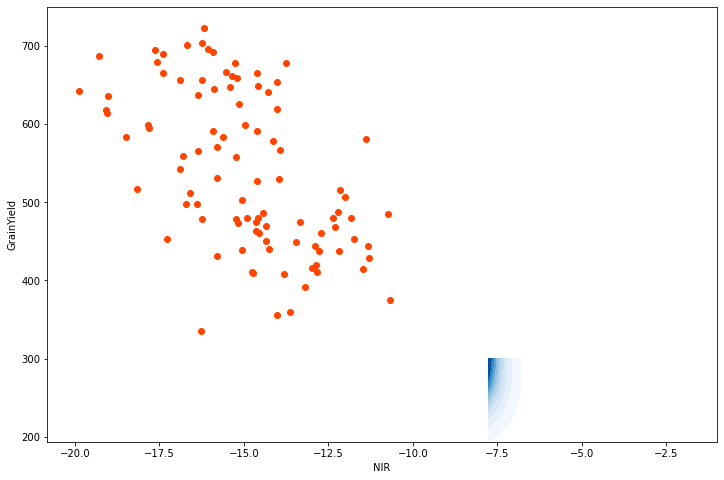

Staur_2019_Simps
Staur_2019_Simps


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


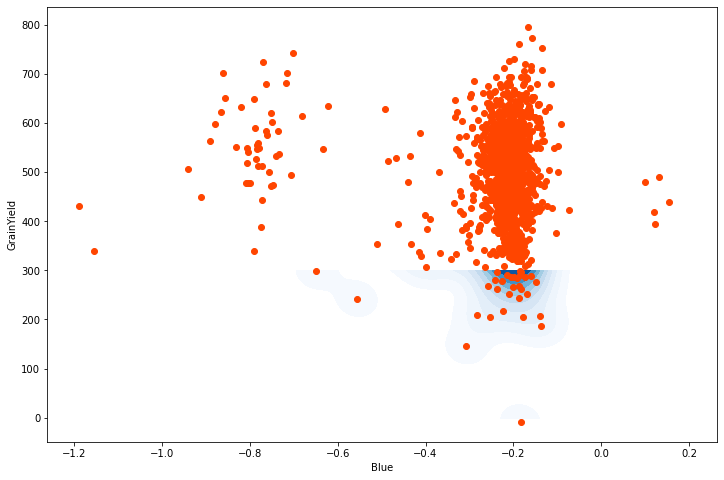

Staur_2019_Simps


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


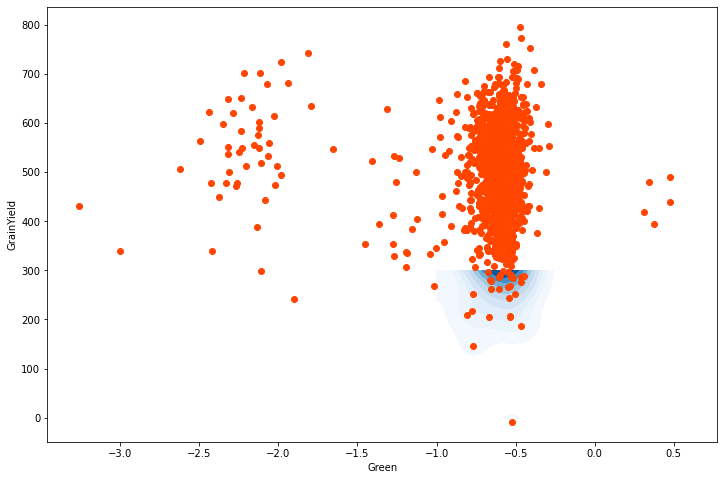

Staur_2019_Simps


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


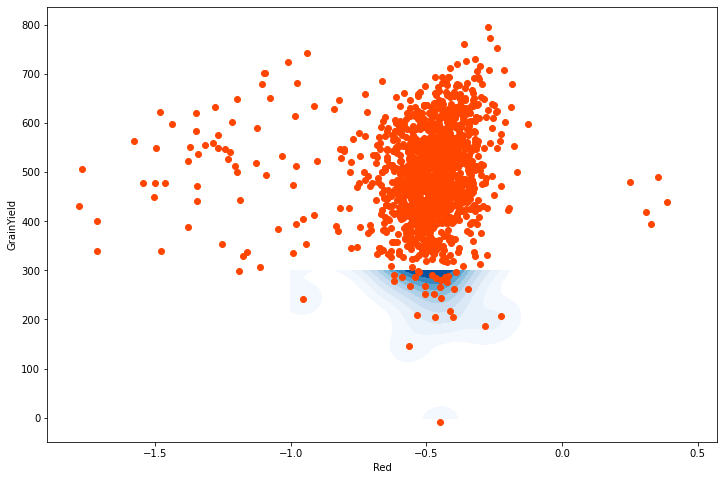

Staur_2019_Simps


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


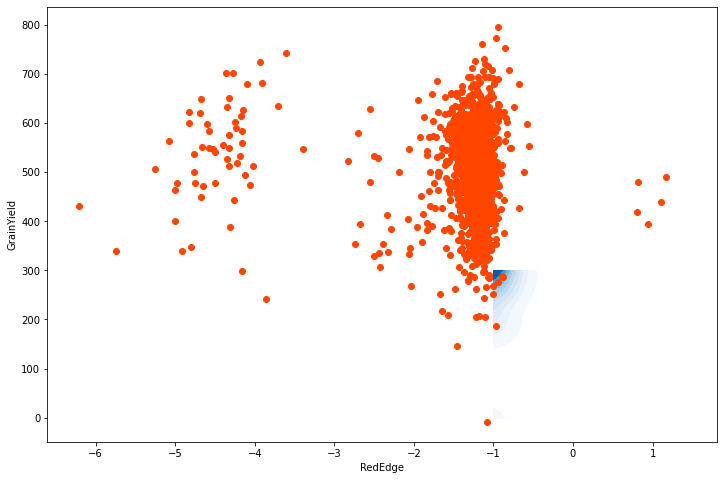

Staur_2019_Simps


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


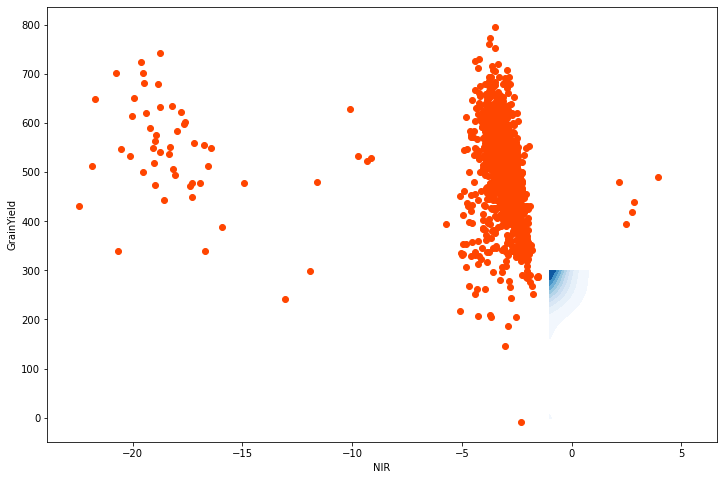

Staur_2019_Trapz
Staur_2019_Trapz


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


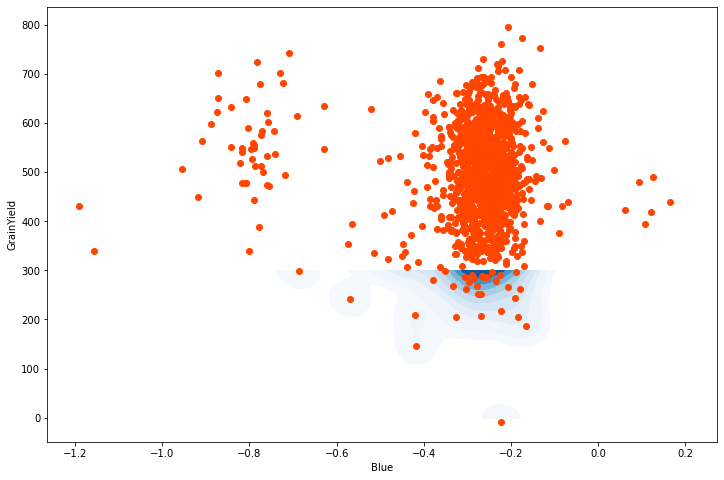

Staur_2019_Trapz


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


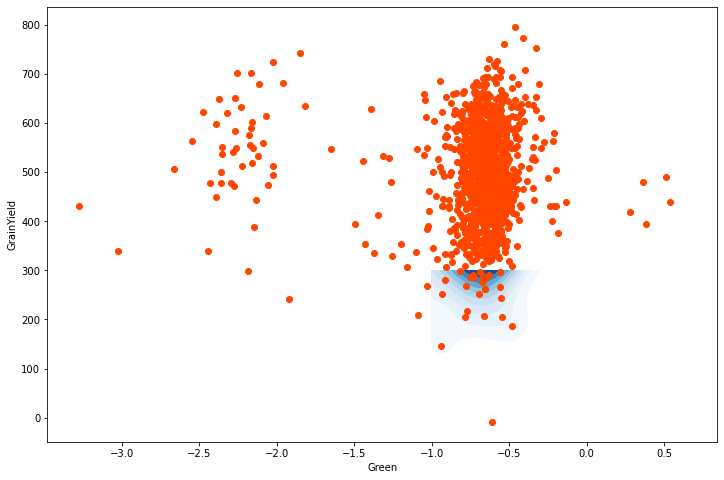

Staur_2019_Trapz


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


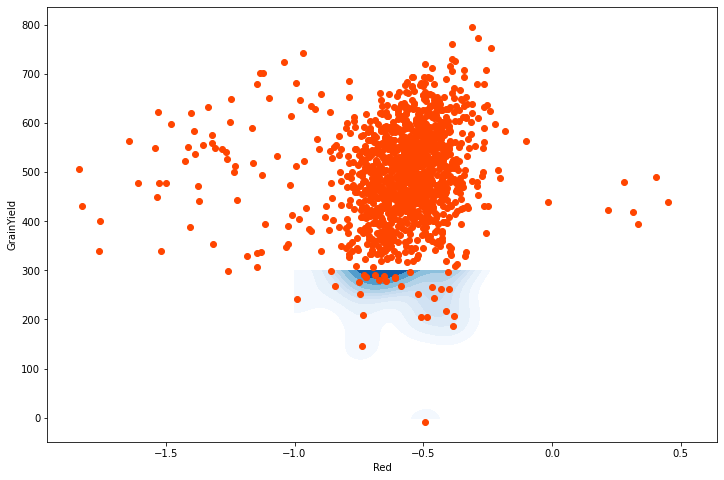

Staur_2019_Trapz


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


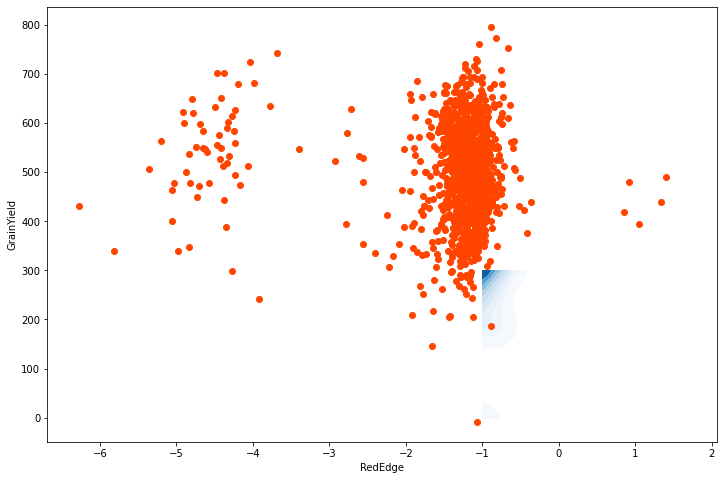

Staur_2019_Trapz


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


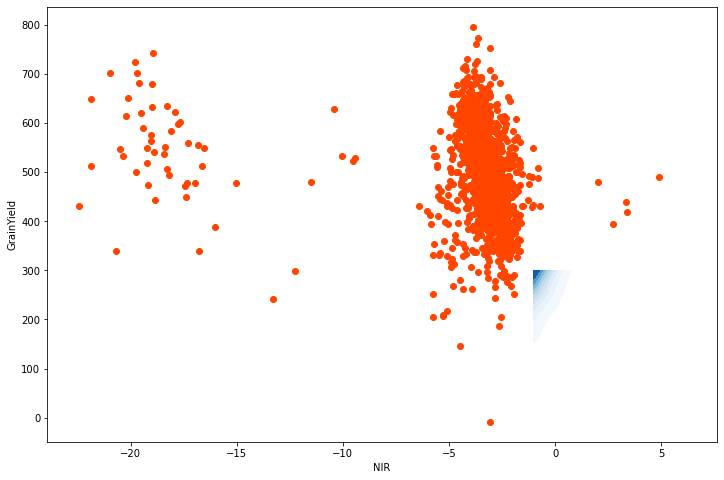

Staur_2020_Simps
Staur_2020_Simps


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


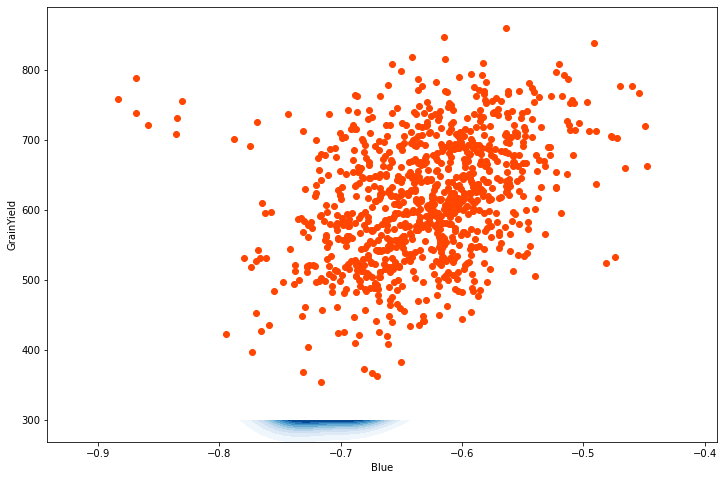

Staur_2020_Simps


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


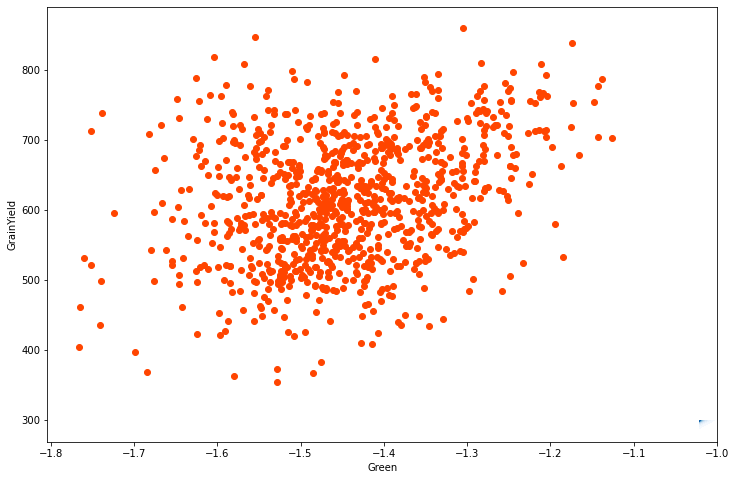

Staur_2020_Simps


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


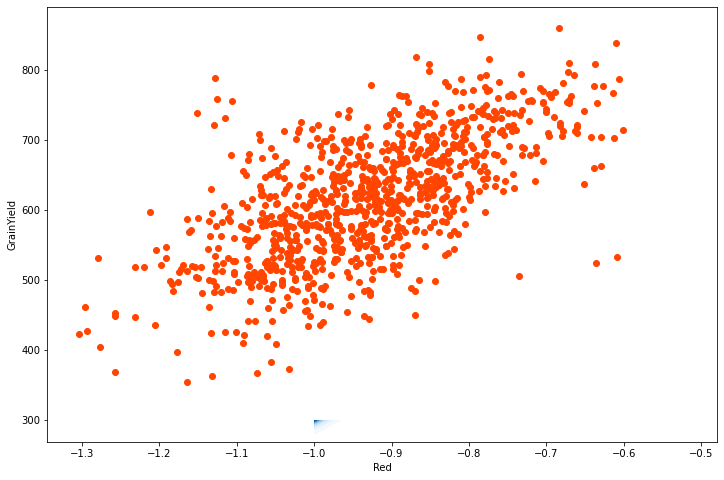

Staur_2020_Simps


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


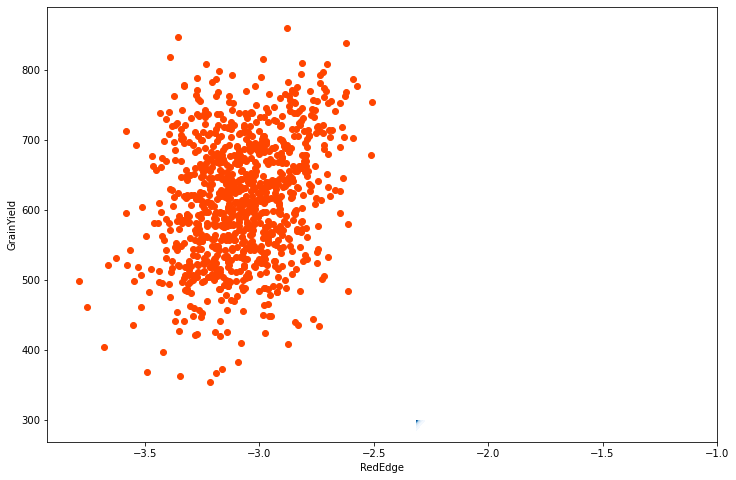

Staur_2020_Simps


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


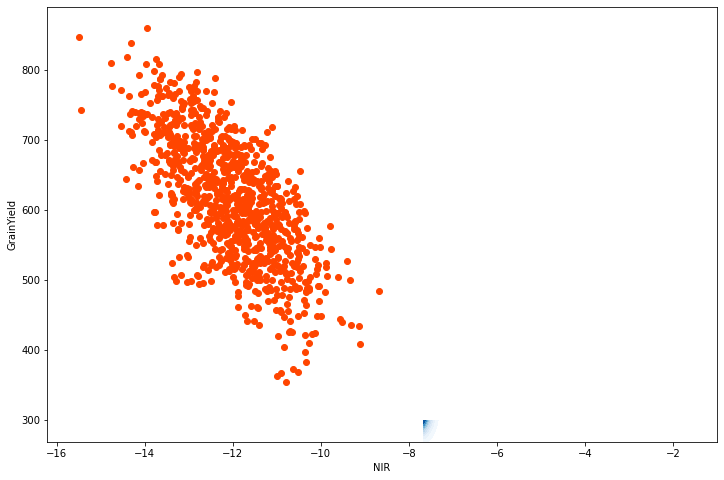

Staur_2020_Trapz
Staur_2020_Trapz


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


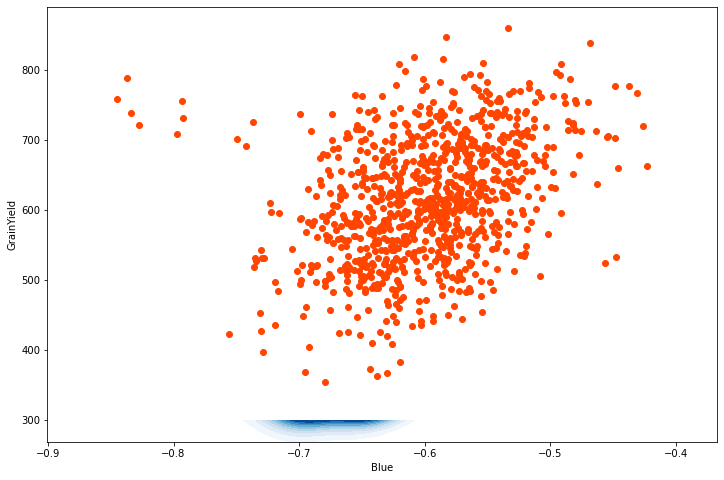

Staur_2020_Trapz


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


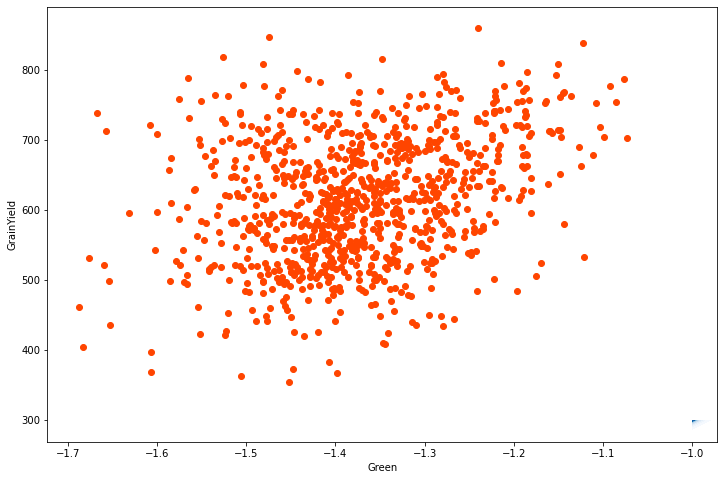

Staur_2020_Trapz


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


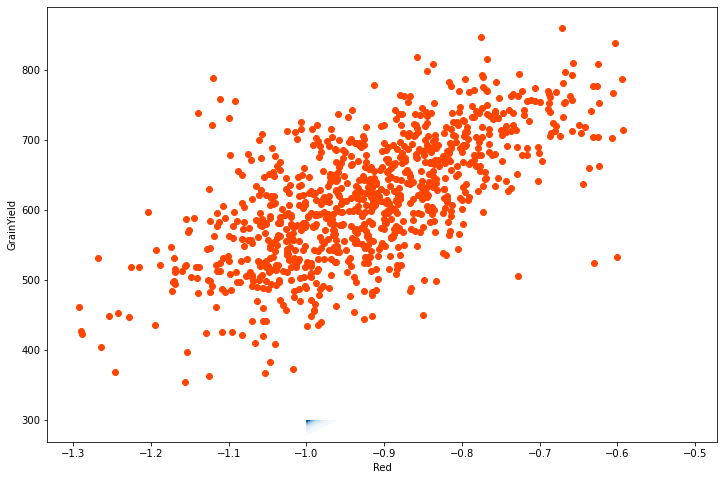

Staur_2020_Trapz


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


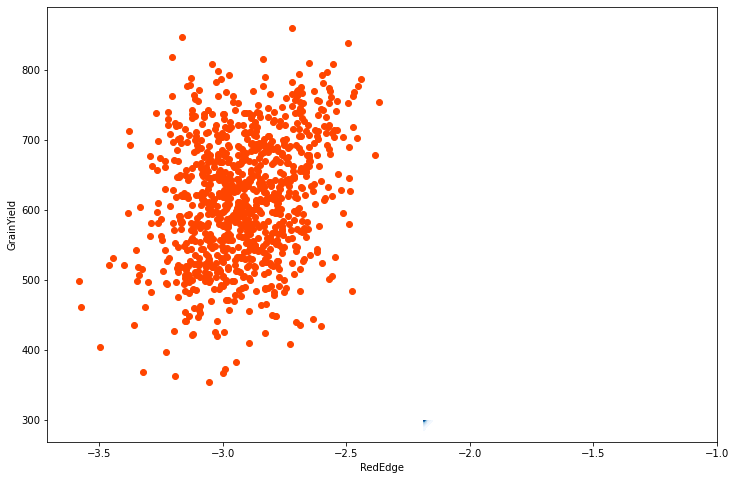

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


Staur_2020_Trapz


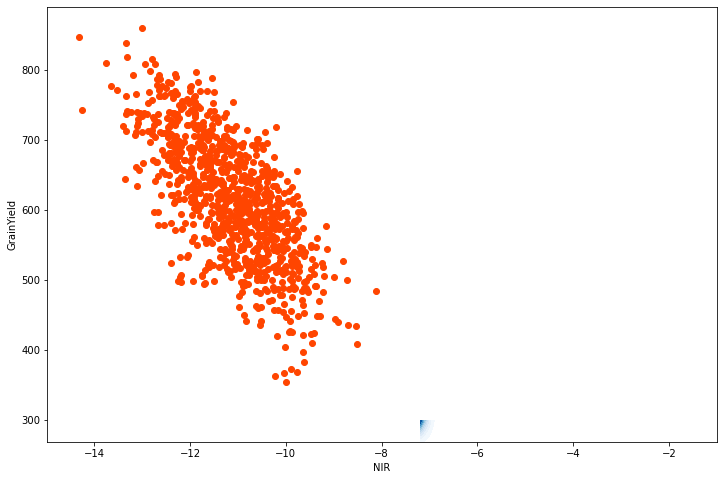

In [57]:
for df in all_df:
    print(df)
    temp_df = locals()[df][base_indices+spectral_indices+['GrainYield']].copy()
    data = temp_df
    for col in base_indices:
        print(df)
        df_a = temp_df[col]
        df_b = temp_df['GrainYield']


        fig, ax = plt.subplots(1, figsize=(12,8))
        sns.kdeplot(df_a, df_b, cmap='Blues',
                   shade=True, shade_lowest=False, clip=(-1,300))
        plt.scatter(df_a, df_b, color='orangered')
        plt.show()

Graminor_2019_Simps


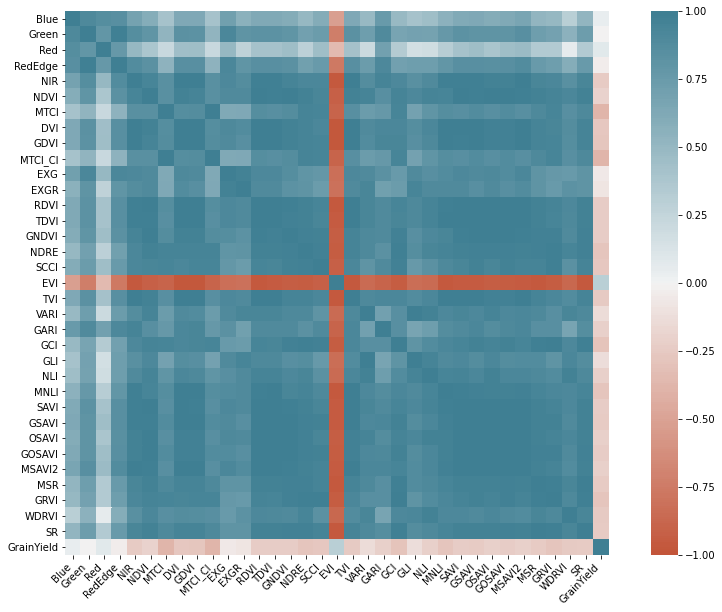

Graminor_2019_Trapz


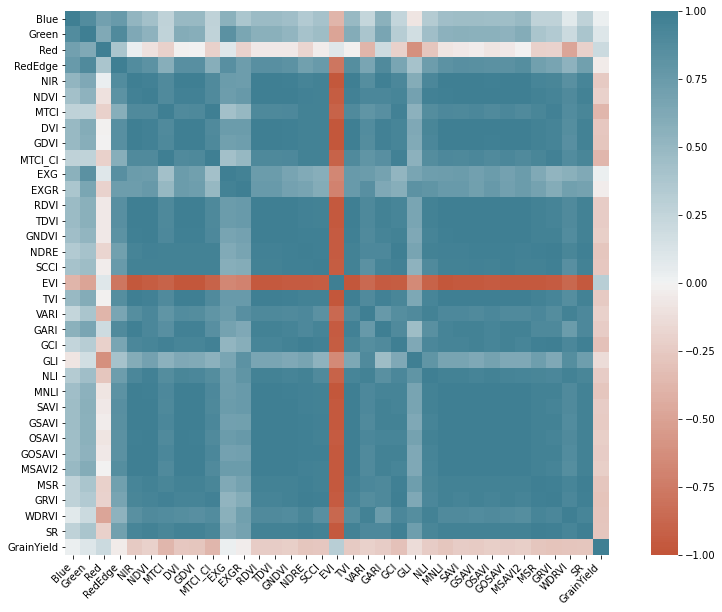

Graminor_2020_Simps


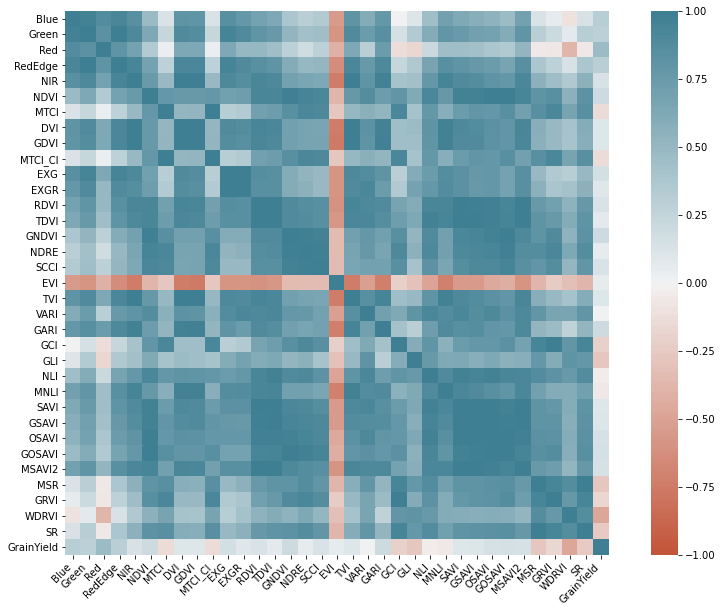

Graminor_2020_Trapz


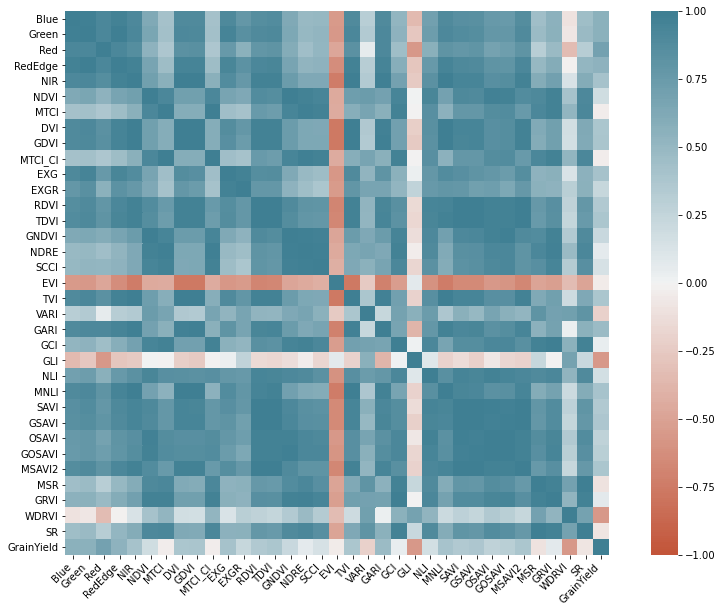

Masbasis_2019_Simps


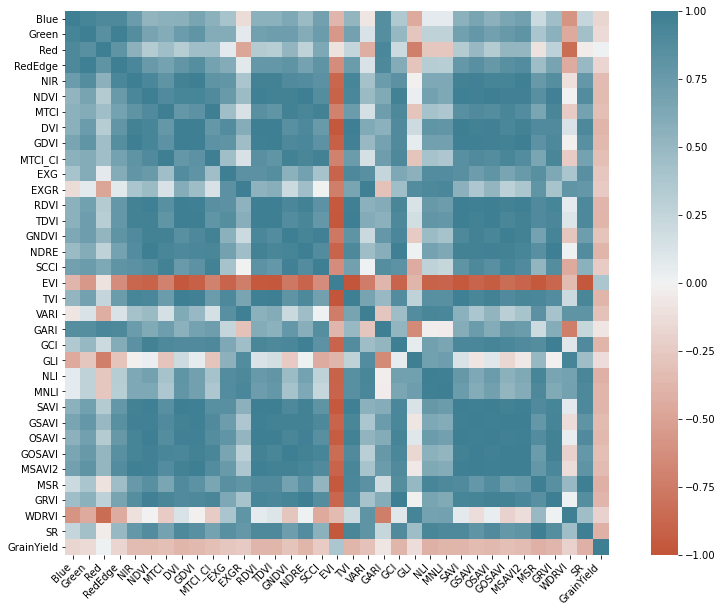

Masbasis_2019_Trapz


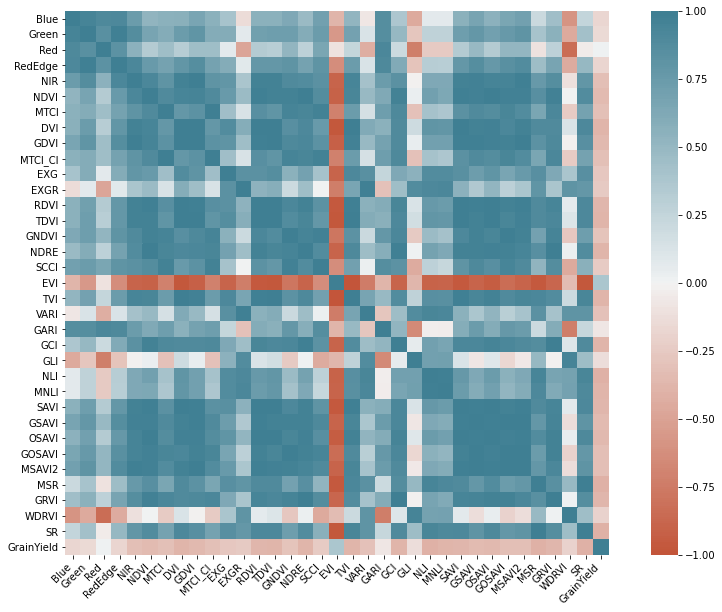

Masbasis_2020_Simps


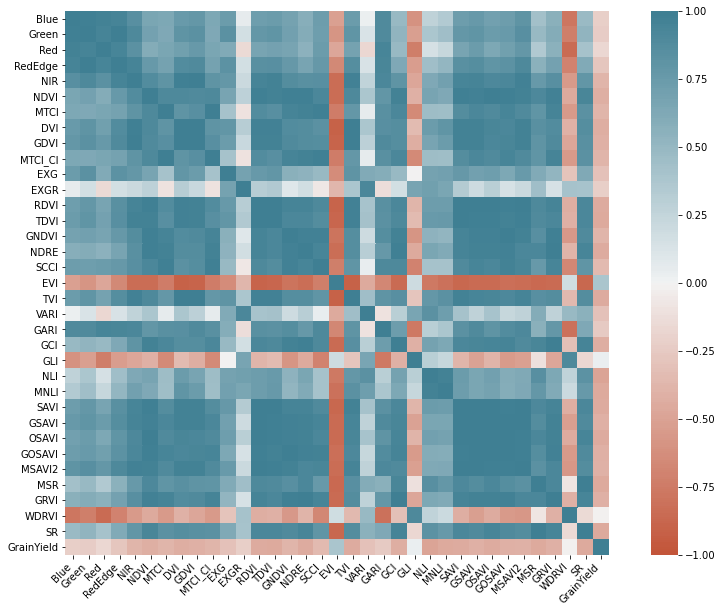

Masbasis_2020_Trapz


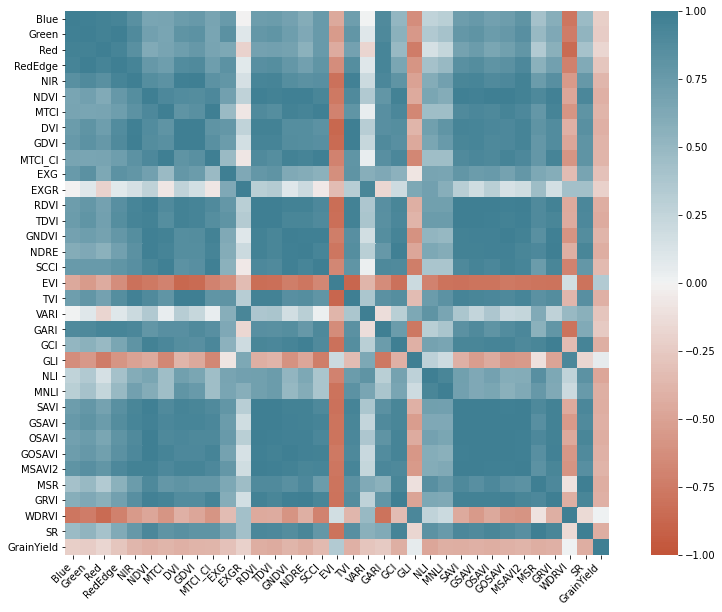

Robot_2020_Simps


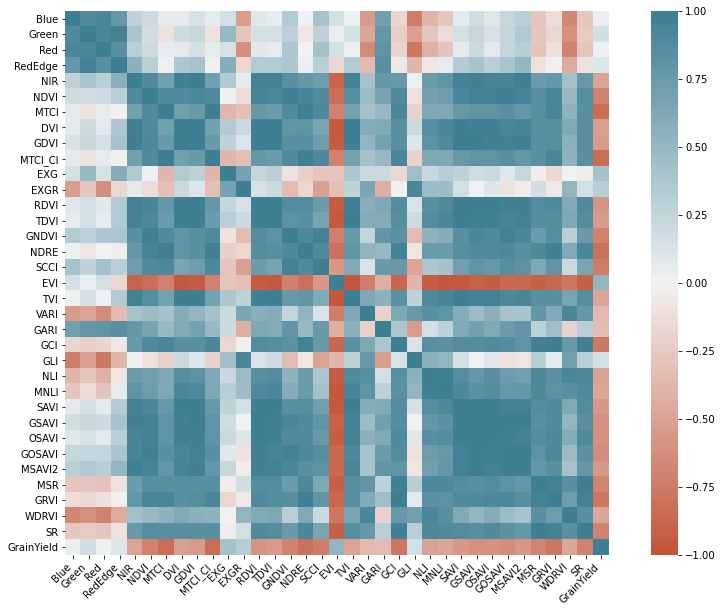

Robot_2020_Trapz


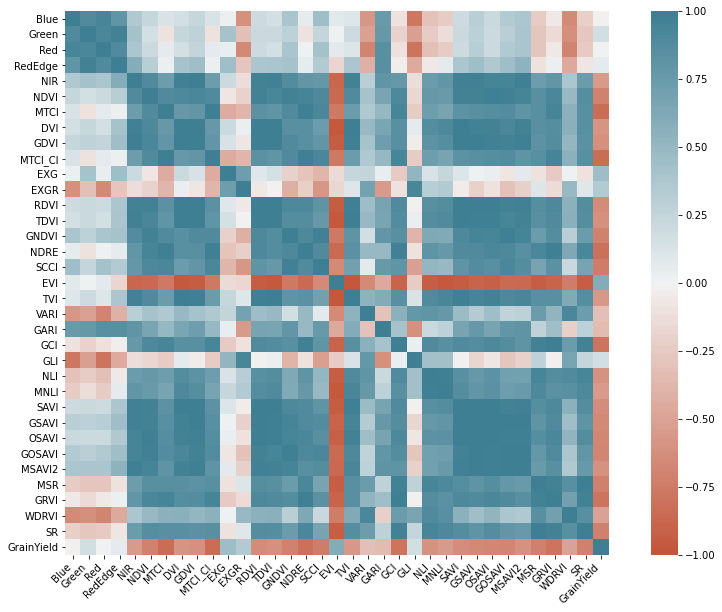

Staur_2019_Simps


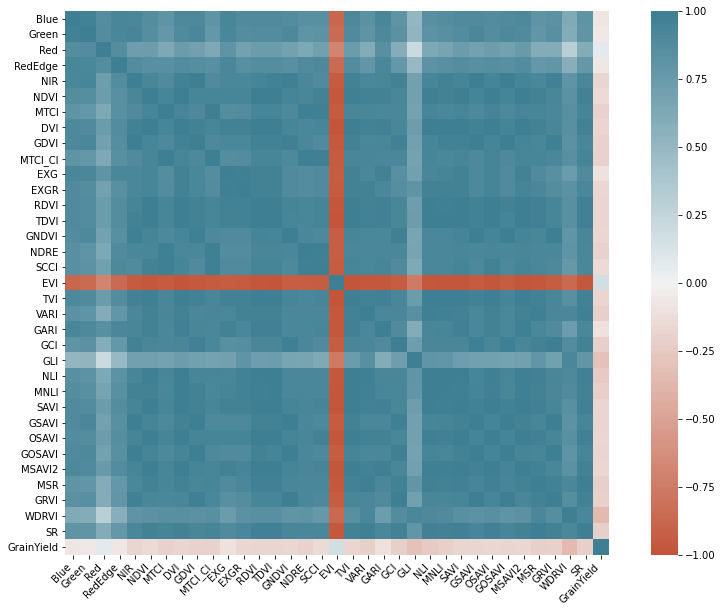

Staur_2019_Trapz


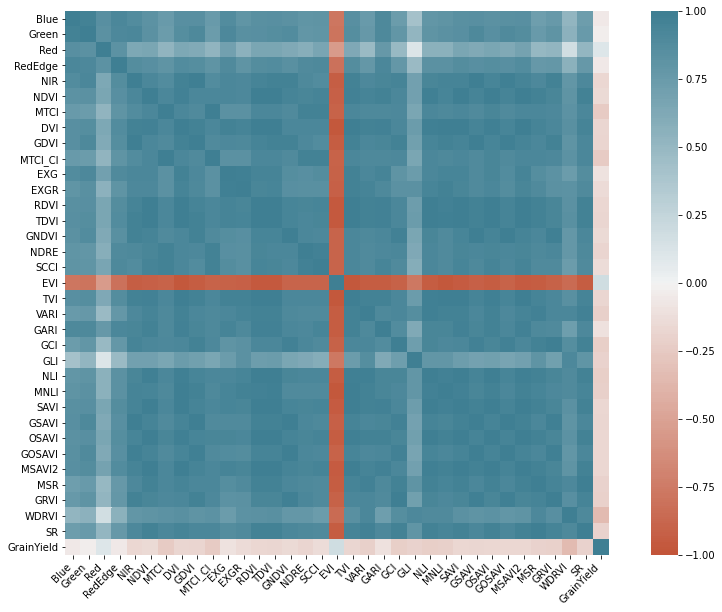

Staur_2020_Simps


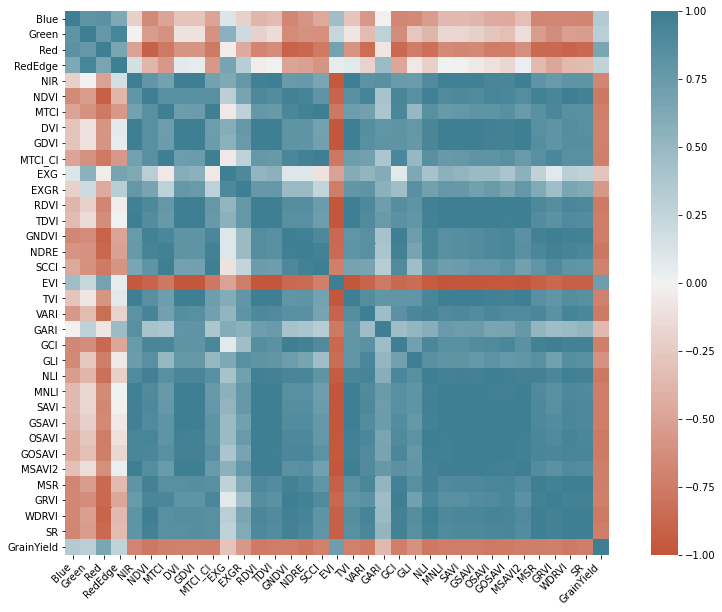

Staur_2020_Trapz


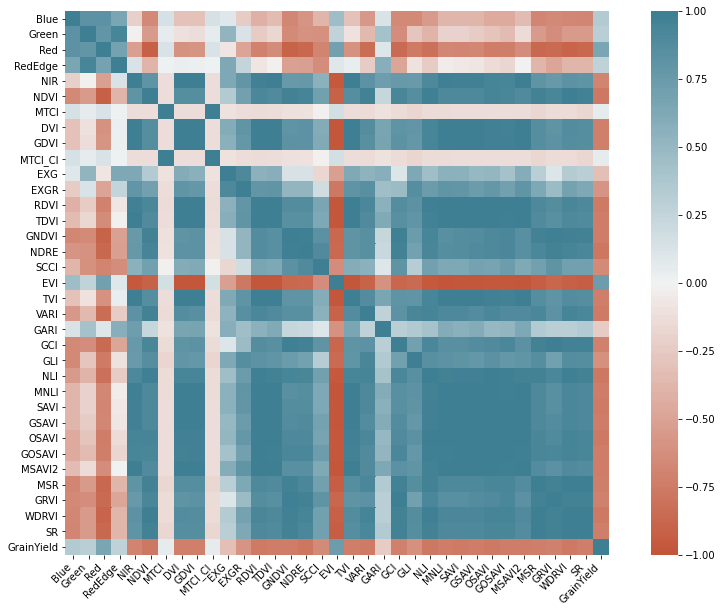

In [58]:
for df in all_df:
    print(df)
    temp_df = locals()[df][base_indices+spectral_indices+['GrainYield']].copy()
    data = temp_df
    columns = temp_df.columns
    corr = data.corr()
    fig_size=(15,10)

    fig, ax = plt.subplots(figsize=fig_size)
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );
    plt.show()

In [59]:
corr['x']

KeyError: 'x'

In [ ]:
corr.columns

In [ ]:
corr.reset_index()

# ML Models

## List of models

In [39]:
models = [
#          CatBoostRegressor(depth=8),
         RandomForestRegressor(random_state=1, n_jobs = -1)]
from sklearn.linear_model import LassoCV
# models = [Lasso()]

## Temp Preparation

In [21]:
id_cols_new = ['Plot_ID']

In [22]:
# df_.iloc[:
#          , :]
# 
int(train_size)

NameError: name 'train_size' is not defined

In [40]:
# Iterating through all possible permutations of the fields dataset
results = []
for df in all_df:

    df_ = locals()[df]

    train_size = int(0.7*df_.shape[0])
    test_size = df_.shape[0] - train_size
    
    train_df = df_.iloc[:train_size, :].copy()
    test_df = df_.iloc[:test_size, :].copy()
    
    print(f"Train dataset: {df} {train_df['GrainYield'].isna().sum()}\
    \n Test dataset: {df} {test_df['GrainYield'].isna().sum()}")
    print('=>')
#     print(f"Missing values in {i[0]} {train_df['GrainYield'].isna().sum()}\
#     \n Missing values in {i[1]} {test_df['GrainYield'].isna().sum()}")
    # Dropping entries with grainyield missing
    train_df.dropna(subset=['GrainYield'], inplace=True)
    test_df.dropna(subset=['GrainYield'], inplace=True)

    #==============================================================================
    # Create separate train/test splits from Main data
    #==============================================================================
    X_train, y_train, = train_df[[x for x in train_df.columns if x not in yield_cols+id_cols_new]], train_df['GrainYield']
    X_test, y_test = test_df[[x for x in test_df.columns if x not in yield_cols+id_cols_new]], test_df['GrainYield']
    features = X_train.columns

    #==============================================================================
    # Scale features using StandardScaler class in scikit-learn 
    #==============================================================================

    # Initialise standard scaler and compute mean and STD from training data
    sc = StandardScaler()
    sc.fit(X_train)

    # Transform (standardise) both X_train and X_test with mean and STD from
    # training data
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    print('RUNNING TRAINING')
    
    for model in models:
        accuracy = {}
        accuracy_train =  {}
        print(model)
        # Predict classes for samples in test set
        model.fit(X_train, y_train)
        print('Training complete')
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        
        success = False
        while not success:
            try:
                importances = model.feature_importances_
                success = True
            except:
                importances = None
                pass
        print(importances)
        

        mse = mean_squared_error(y_test, y_pred, squared=True)
        #mse_std = mean_squared_error(y_test, y_pred_std, squared=True)
        mse_train = mean_squared_error(y_train, y_pred_train, squared=True)

        accuracy['MSE'] = mse
        #accuracy_std['MSE'] = mse_std
        accuracy_train['MSE'] = mse_train

        rmse = mean_squared_error(y_test, y_pred, squared=False)
        #rmse_std = mean_squared_error(y_test, y_pred_std, squared=False)
        rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)

        accuracy['RMSE'] = rmse
        #accuracy_std['RMSE'] = rmse_std
        accuracy_train['RMSE'] = rmse_train

        r2 = r2_score(y_test, y_pred)
        #r2_std = r2_score(y_test, y_pred_std)
        r2_train = r2_score(y_train, y_pred_train)

        accuracy['R2 Score'] = r2
        #accuracy_std['R2 Score'] = r2_std
        accuracy_train['R2 Score'] = r2_train
        print(accuracy)
        print(accuracy_train)
#         acc, acc_std, imp, imp_std = test_data_regression(model, features, X_train, X_train_std, y_train, X_test, X_test_std, y_test)
#         results.append([i[0], i[1], model, acc, acc_std, imp, imp_std])
        print('=============================================')

Train dataset: Masbasis_2019 0    
 Test dataset: Masbasis_2019 0
=>
RUNNING TRAINING
RandomForestRegressor(n_jobs=-1, random_state=1)
Training complete
[0.09152513 0.02643938 0.0130707  0.02680289 0.01907472 0.00808199
 0.02782718 0.007386   0.05104787 0.0212334  0.08489081 0.02996745
 0.00658135 0.00563106 0.01644337 0.01766857 0.08870575 0.02601953
 0.00921954 0.01383995 0.02325558 0.01521893 0.03183753 0.02561653
 0.01760827 0.00471463 0.12412479 0.00742548 0.09968839 0.01006102
 0.01220144 0.01445432 0.00941523 0.01292121]
{'MSE': 925.6922968803726, 'RMSE': 30.425191813370258, 'R2 Score': 0.8430725473959549}
{'MSE': 872.9399894551524, 'RMSE': 29.545557863326128, 'R2 Score': 0.8770462055819732}
Train dataset: Masbasis_2020 0    
 Test dataset: Masbasis_2020 0
=>
RUNNING TRAINING
RandomForestRegressor(n_jobs=-1, random_state=1)
Training complete
[0.02083248 0.0196234  0.02936799 0.03060042 0.01898363 0.04654987
 0.02895395 0.01606069 0.02033949 0.02456855 0.03252526 0.02278837
 0.01

In [35]:
accuracy

{'MSE': 6878.8159028271475,
 'RMSE': 82.93862732663924,
 'R2 Score': 0.16027485579267986}

In [36]:
accuracy_train

{'MSE': 6671.577292858724,
 'RMSE': 81.6797238784432,
 'R2 Score': 0.09469069367102434}

In [25]:
# # Iterating through all possible permutations of the fields dataset
# results = []
# for i in itertools.permutations(all_df, 2):

# #     train_df = locals()[i[0]].copy()
# #     test_df = locals()[i[1]].copy()

#     train_size = 0.7*locals()[i[0]].shape[0]
    
#     train_df = locals()[i[0]].copy()
#     test_df = locals()[i[1]].copy()
    
#     print(f"Train dataset: {i[0]} {train_df['GrainYield'].isna().sum()}\
#     \n Test dataset: {i[1]} {test_df['GrainYield'].isna().sum()}")
#     print('=>')
# #     print(f"Missing values in {i[0]} {train_df['GrainYield'].isna().sum()}\
# #     \n Missing values in {i[1]} {test_df['GrainYield'].isna().sum()}")
#     # Dropping entries with grainyield missing
#     train_df.dropna(subset=['GrainYield'], inplace=True)
#     test_df.dropna(subset=['GrainYield'], inplace=True)

#     #==============================================================================
#     # Create separate train/test splits from Main data
#     #==============================================================================
#     X_train, y_train, = train_df[[x for x in train_df.columns if x not in yield_cols+id_cols_new]], train_df['GrainYield']
#     X_test, y_test = test_df[[x for x in test_df.columns if x not in yield_cols+id_cols_new]], test_df['GrainYield']
#     features = X_train.columns

#     #==============================================================================
#     # Scale features using StandardScaler class in scikit-learn 
#     #==============================================================================

#     # Initialise standard scaler and compute mean and STD from training data
#     sc = StandardScaler()
#     sc.fit(X_train)

#     # Transform (standardise) both X_train and X_test with mean and STD from
#     # training data
#     X_train_std = sc.transform(X_train)
#     X_test_std = sc.transform(X_test)
    
#     for model in models:
#         print(model)
#         acc, acc_std, imp, imp_std = test_data_regression(model, features, X_train, X_train_std, y_train, X_test, X_test_std, y_test)
# #         results.append([i[0], i[1], model, acc, acc_std, imp, imp_std])
#         print('=============================================')

Train dataset: Masbasis_2019 0    
 Test dataset: Masbasis_2020 0
=>
LassoCV()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5535.932080027182, tolerance: 297.62128302691184
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1115.4831712734886, tolerance: 297.62128302691184
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4237.515524189454, tolerance: 297.62128302691184
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525

KeyboardInterrupt: 

In [22]:
train_dfs = [x[0] for x in results]
test_dfs = [x[1] for x in results]
modelss = [x[2] for x in results]
acc_normal = [x[3] for x in results]
acc_stds = [x[4] for x in results]
imp_normal = [x[5] for x in results]
imp_stds = [x[6] for x in results]
# acc_normal

TypeError: Cannot cast array data from dtype('float64') to dtype('<U32') according to the rule 'safe'

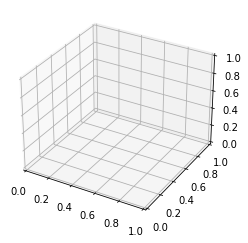

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = train_dfs, test_dfs
hist, xedges, yedges = np.histogram2d(x, y, bins=4, range=[[0, 4], [0, 4]])

# Construct arrays for the anchor positions of the 16 bars.
# xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
# xpos = xpos.ravel()
# ypos = ypos.ravel()
# zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

In [48]:
temp_df = Robot_2020_Simps.copy()
#==============================================================================
# Dropping rows with missing values
#==============================================================================

temp_df.dropna(subset=['GrainYield'], inplace=True)
#==============================================================================
# Split dataframe into data and target
#==============================================================================
X = temp_df[[x for x in temp_df.columns if x not in yield_cols+id_cols_new]]
y = temp_df['GrainYield']

#==============================================================================
# Create separate train/test splits from Main data
#==============================================================================
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=55)

#==============================================================================
# Scale features using StandardScaler class in scikit-learn 
#==============================================================================

# Initialise standard scaler and compute mean and STD from training data
sc = StandardScaler()
sc.fit(X_train)

# Transform (standardise) both X_train and X_test with mean and STD from
# training data
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Wall time: 0 ns
4622.957956091049  mean_squared_error
67.99233748071211  root_mean_squared_error
0.5318637828980128  r2_score
{   'MSE': 4622.957956091049,
    'RMSE': 67.99233748071211,
    'R2 Score': 0.5318637828980128}


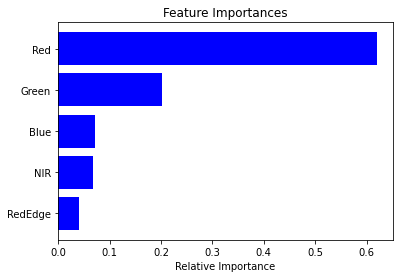

11130.99549980016  mean_squared_error
105.50353311524766  root_mean_squared_error
-0.12716191134511434  r2_score
{   'MSE': 11130.99549980016,
    'RMSE': 105.50353311524766,
    'R2 Score': -0.12716191134511434}


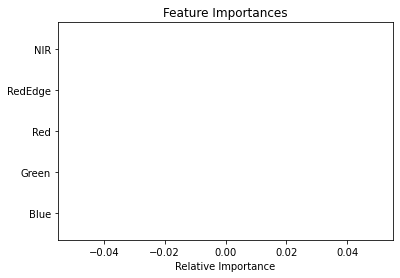

In [16]:
%time

cv = 10
core=6
verbos=5
scores = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']

time_taken = []
t_start=time.time()

#==============================================================================
# Create separate train/test splits
#==============================================================================
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=5)
# X_train.reset_index(drop=True, inplace=True)
# X_test.reset_index(drop=True, inplace=True)
#==============================================================================
# Training best performing models
#==============================================================================
#==============================================================================
# Finding out feature importance
#==============================================================================

model = RandomForestRegressor(n_estimators = 1000, max_depth=250, min_samples_split=5, random_state=0, n_jobs = -1)
model.fit(X_train, y_train)
# Finding feature importance
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)
# Running predictions
test_data_regression(model, X, X_test, y_test)
# Plotting feature importance
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



model = RandomForestRegressor(n_estimators = 50, max_depth=100, min_samples_split=400, random_state=0, n_jobs = -1)
model.fit(X_train, y_train)
# Finding feature importance
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)
# Running predictions
test_data_regression(model, X, X_test, y_test)
# Plotting feature importance
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Several Models: To clean

In [26]:
#==============================================================================
# Ridge
#==============================================================================
from sklearn.linear_model import Ridge
model = Ridge()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__alpha' : [x*1. for x in range(1,10)],
                  'model__solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)
#==============================================================================
# Lasso
#==============================================================================
from sklearn.linear_model import Lasso
model = Lasso()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__alpha' : [x*0.1 for x in range(1,10)],
                  'model__max_iter' : [x for x in range(50, 10000, 50)],
                  'model__selection' : ['cyclic','random']}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)
#==============================================================================
# ElasticNet
#==============================================================================
from sklearn.linear_model import ElasticNet
model = ElasticNet()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__alpha' : [x*0.1 for x in range(1,10)],
                  'model__max_iter' : [x for x in range(50, 10000, 50)],
                  'model__l1_ratio' : [x*0.1 for x in range(1,10)]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)
#==============================================================================
# OrthogonalMatchingPursuit
#==============================================================================
from sklearn.linear_model import OrthogonalMatchingPursuit
model = OrthogonalMatchingPursuit()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__fit_intercept' : [True, False],
                  'model__n_nonzero_coefs' : [x for x in range(1,10)]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)
#==============================================================================
# BayesianRidge
#==============================================================================
from sklearn.linear_model import BayesianRidge
model = BayesianRidge()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__n_iter' : [x for x in range(5, 150, 10)],
                  'model__alpha_1' : [1.0],
                  'model__alpha_2' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
                  'model__lambda_1' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
                  'model__lambda_2' : [1.0]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)
#==============================================================================
# ARDRegression
#==============================================================================
from sklearn.linear_model import ARDRegression
model = ARDRegression()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__n_iter' : [x for x in range(5, 150, 10)],
                  'model__alpha_1' : [1.0],
#                       'model__alpha_2' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
                  'model__lambda_1' : [0.01],
                  'model__lambda_2' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
                  'model__verbose' : [True]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)
#==============================================================================
# RANSACRegressor
#==============================================================================
from sklearn.linear_model import RANSACRegressor
model = RANSACRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__min_samples' : [x/.1 for x in range(1, 10)],
                  'model__max_trials' : [x for x in range(1, 500,50)],
                  'model__loss' : ['absolute_loss', 'squared_loss']}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)
#==============================================================================
# TheilSenRegressor
#==============================================================================
# from sklearn.linear_model import TheilSenRegressor
# model = TheilSenRegressor()
# sc = StandardScaler()
# pipe = Pipeline(steps=[('sc', sc), ('model', model)])
# param_grid   =  [{'model__max_subpopulation' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
#                   'model__n_subsamples' : [x for x in range(9, 1300,50)],
#                   'model__max_iter' :  [x for x in range(50, 1000, 50)]}]
# estimator = pipe

# for score in scores:
#     grid(Xtrain = X,
#                 ytrain = y,
#                 estimator = pipe,
#                 params_grid = param_grid,
#                 scores=score,
#                 cvs = cv,
#                 cores=core,
#                 verb=verbos)
#     print(score)
#==============================================================================
# HuberRegressor
#==============================================================================
from sklearn.linear_model import HuberRegressor
model = HuberRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__epsilon' : [x/.01 for x in range(100, 200, 5)],
                  'model__alpha' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)
#==============================================================================
# DecisionTreeRegressor
#==============================================================================
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__max_depth' : [None]+[x for x in range(1, 100,5)],
                  'model__min_samples_leaf' : [x for x in range(1, 50,5)],
                  'model__min_samples_split' : [2]+[x for x in range(1, 50,5)],
                  'model__max_features' : [x for x in range(1, 10)]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)
#==============================================================================
# GaussianProcessRegressor
#==============================================================================
from sklearn.gaussian_process import GaussianProcessRegressor
model = GaussianProcessRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__kernel' : [None]+['rbf', 'sigmoid',  'linear', 'poly'],
                  'model__alpha' : [x*0.0000000001 for x in [1,10,100,1000,10000,100000,1000000]]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)
#==============================================================================
# KNeighborsRegressor
#==============================================================================
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__n_neighbors' : [x for x in range(1, 100,5)],
                  'model__weights' : ['uniform', 'distance'],
                  'model__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'model__leaf_size' : [x for x in range(10, 50, 5)]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)
# #==============================================================================
# # RadiusNeighborsRegressor
# #==============================================================================
# from sklearn.neighbors import RadiusNeighborsRegressor
# model = RadiusNeighborsRegressor()
# sc = StandardScaler()
# pipe = Pipeline(steps=[('sc', sc), ('model', model)])
# param_grid   =  [{'model__radius' : [x*1. for x in range(1, 10)],
#                   'model__weights' : ['uniform', 'distance'],
#                   'model__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                   'model__p' : [x for x in range(1, 10)]}]
# estimator = pipe

# for score in scores:
#     grid(Xtrain = X,
#                 ytrain = y,
#                 estimator = pipe,
#                 params_grid = param_grid,
#                 scores=score,
#                 cvs = cv,
#                 cores=core,
#                 verb=verbos)
#     print(score)
# #==============================================================================
# # RandomForestRegressor
# #==============================================================================
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor()
# sc = StandardScaler()
# pipe = Pipeline(steps=[('sc', sc), ('model', model)])
# param_grid   =  [{'model__radius' : [x*1. for x in range(1, 10)],
#                   'model__weights' : ['uniform', 'distance'],
#                   'model__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                   'model__p' : [x for x in range(1, 10)]}]
# estimator = pipe

# for score in scores:
#     grid(Xtrain = X,
#                 ytrain = y,
#                 estimator = pipe,
#                 params_grid = param_grid,
#                 scores=score,
#                 cvs = cv,
#                 cores=core,
#                 verb=verbos)
#     print(score)
# #==============================================================================
# # SVR
# #==============================================================================
# from sklearn.svm import SVR
# model = SVR()
# sc = StandardScaler()
# pipe = Pipeline(steps=[('sc', sc), ('model', model)])
# param_grid   =  [{'model__radius' : [x*1. for x in range(1, 10)],
#                   'model__weights' : ['uniform', 'distance'],
#                   'model__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                   'model__p' : [x for x in range(1, 10)]}]
# estimator = pipe

# for score in scores:
#     grid(Xtrain = X,
#                 ytrain = y,
#                 estimator = pipe,
#                 params_grid = param_grid,
#                 scores=score,
#                 cvs = cv,
#                 cores=core,
#                 verb=verbos)
#     print(score)

t_end = time.time()
tt = t_end - t_start
time_taken.append(tt)
print('Total time complete: ', (tt) / 60, 'minutes')

Wall time: 0 ns


NameError: name 'comments' is not defined

## Gradient Boosting Regressor Grid Search Params

In [ ]:
%time

import time, datetime
from datetime import datetime as dt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

comments.append('Converted dates to ordinal.')
comments.append('Plot ID Dropped.')

comments.append('Test train split. test_Size=0.3, random_state=55')
cv = 10
core=6
verbos=5
scores = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']


#==============================================================================
# GradientBoostingRegressor
#==============================================================================
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
# param_grid   =  [{'model__loss' : ['ls', 'lad', 'huber', 'quantile'],
# #                   'model__learning_rate' : [0.001, 0.01, 0.1, 1],
# #                   'model__n_estimators' : range(0,500, 100),
                  
# #                   'model__max_depth':range(5,16,2), 
# #                   'model__min_samples_split':range(200,1100, 200), # 2100
# #                   'model__min_samples_leaf':range(30,71,10),
#                   'model__max_features':range(7,20,2),
#                   'model__subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}]

param_grid   =  [{'model__loss' : ['huber'],
#                   'model__learning_rate' : [0.001, 0.01, 0.1, 1],
#                   'model__n_estimators' : range(0,500, 100),
                  
                  'model__max_depth':range(5,16,2), 
#                   'model__min_samples_split':range(2,5), # 2100
#                   'model__min_samples_leaf':range(1,2),
#                   'model__max_features':range(5,6),
                  'model__subsample':[0.7,0.8]}]
# pipe.get_params()
estimator = pipe

for score in scores:
    grid(Xtrain = X.values,
                ytrain = y.values,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)

## Random Forest Grid Search Params

In [ ]:
%time

import time, datetime
from datetime import datetime as dt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

comments.append('Converted dates to ordinal.')
comments.append('Plot ID Dropped.')
comments.append('Test train split. test_Size=0.3, random_state=55')
cv = 5
core=6
verbos=5
scores = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']

#==============================================================================
# RandomForestRegressor
#==============================================================================
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {
    'model__n_estimators': n_estimators,
               'model__max_features': max_features,
               'model__max_depth': max_depth,
               'model__min_samples_split': min_samples_split,
               'model__min_samples_leaf': min_samples_leaf,
               'model__bootstrap': bootstrap}


estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)

## Permutation importance

In [ ]:


# PERMUTATION

from sklearn.inspection import permutation_importance


result = permutation_importance(gs_xgb_fitted, X_test, y_test, n_repeats=100, random_state=0)

# ==================================
# Feature selection
# ===================================

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

# Plot importances
fig, ax = plt.subplots(figsize=(25, 25))
ind = indices = np.argsort(result.importances_mean)[::-1]
plt.barh(X_test.columns, result.importances_mean[ind])
plt.show()


In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'recall': make_scorer(recall_score, average = 'macro'),
           'f1': make_scorer(f1_score, average = 'macro')}
grid_search_rfc = GridSearchCV(rfc, param_grid = grid_values, scoring = scoring, refit='f1')
grid_search_rfc.fit(x_train, y_train)

grid_search_rfc.best_params_
grid_search_rfc.cv_results_

# cv_results[‘mean_test_<metric_name>’]
grid_search_rfc.cv_results_['mean_test_recall']


## List of models

In [14]:
models = [GradientBoostingRegressor(subsample=0.8,learning_rate=0.4, random_state=500),
#          CatBoostRegressor(depth=8),
         RandomForestRegressor(max_depth=250, min_samples_split=14,min_samples_leaf =3, random_state=1, n_jobs = -1),
         Lasso(alpha= 4.5),
        ]
         


In [17]:
for df in all_df:
    
    
    temp_df = locals()[df].copy()
    #==============================================================================
    # Dropping rows with missing values
    #==============================================================================

    temp_df.dropna(subset=['GrainYield'], inplace=True)
    #==============================================================================
    # Split dataframe into data and target
    #==============================================================================
    X = temp_df[[x for x in temp_df.columns if x not in yield_cols+id_cols_new]]
    y = temp_df['GrainYield']
    
    #==============================================================================
    # Create separate train/test splits from Main data
    #==============================================================================
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.3,
                                                        random_state=55)
    
    #==============================================================================
    # Scale features using StandardScaler class in scikit-learn 
    #==============================================================================

    # Initialise standard scaler and compute mean and STD from training data
    sc = StandardScaler()
    sc.fit(X_train)

    # Transform (standardise) both X_train and X_test with mean and STD from
    # training data
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    
    #==============================================================================
    # Correlation heatmap of indices with target_cols
    #==============================================================================
#     sns.diverging_palette(331, 129, as_cmap=True)

#     pal=['PRGn', 'PiYG', 'PuOr', 'RdBu','RdYlBu','RdYlGn','Spectral']

#     correlation = temp_df.iloc[:,1:].corr()
#     matrix = np.triu(correlation)

#     plt.figure(figsize=(10,6))
#     plt.title(df)
#     sns.heatmap(correlation, cmap='PRGn', annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0 ,square=True, mask=matrix)
#     # plt.savefig('Data/heatmap.pdf',dpi=500, bbox_inches='tight')
#     plt.show()


    #==============================================================================
    # Predictions
    #==============================================================================

    param=[x/10 for x in range(25,100)]
    param=[x for x in range(0,1000, 100)]
    param=[1]
    for pr in tqdm(param):
        for model in models:
            R2 = []
            RMSE=[]
            MAE=[]
            for rs in range(10):
                #==============================================================================
                # Create separate train/test splits
                #==============================================================================
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rs)
                X_train.reset_index(drop=True, inplace=True)
                X_test.reset_index(drop=True, inplace=True)
                sc = StandardScaler()
                sc.fit(X_train)
                X_train_std = sc.transform(X_train)
                X_test_std = sc.transform(X_test)
                #==============================================================================
                # Training best performing models
                #==============================================================================
    #             model = Lasso(alpha= 4.5)
                model.fit(X_train_std, y_train)
                y_pred = model.predict(X_test_std)
                R2.append(r2_score(y_test, y_pred))
                MAE.append(mean_absolute_error(y_test, y_pred))
                RMSE.append(mean_squared_error(y_test, y_pred, squared=False))
            accuracy = {}
            accuracy['R2'] = R2
            accuracy['MAE'] = MAE
            accuracy['RMSE'] = RMSE
            scores={}
            for k, s in accuracy.items():
                scores[k]=(sum(s)/len(s))
            print(df, model)
            print(scores)


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

Graminor_2019_Simps Lasso(alpha=4.5)
{'R2': 0.2766057687373555, 'MAE': 32.66034367712789, 'RMSE': 42.005856416111}


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

Masbasis_2019_Simps Lasso(alpha=4.5)
{'R2': 0.6297025357618344, 'MAE': 37.262246565594445, 'RMSE': 51.11134236295846}


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

Masbasis_2020_Simps Lasso(alpha=4.5)
{'R2': 0.3878735086099309, 'MAE': 60.945731868063774, 'RMSE': 80.61812947784689}


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.16s/it]

Robot_2020_Simps Lasso(alpha=4.5)
{'R2': 0.603406107404101, 'MAE': 47.1277450620497, 'RMSE': 59.06752734372742}


In [15]:
for model in models:
    model.fit(X_train_std, y_train)
    y_pred = model.predict(X_test_std)
    print(y_pred)

NameError: name 'X_train_std' is not defined

In [ ]:
plot_feature_importance(model.feature_importances_,X_train.columns,'Gradient Boosting Regressor')


In [1]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential([
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)])
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [100]:
y.isna()

0      False
1      False
2      False
3      False
4      False
       ...  
596    False
597    False
598    False
599    False
600    False
Name: GrainYield, Length: 601, dtype: bool

## Restart the kernel

In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")